In [1]:
import os
from dataclasses import dataclass, field
from pathlib import Path
from typing import Union, Optional
import draccus
from accelerate.utils import set_seed
from vlm_eval.conf import DatasetConfig, DatasetRegistry
from vlm_eval.models import load_vlm
from vlm_eval.overwatch import initialize_overwatch
from vlm_eval.tasks import get_task_runner

RUN_DIR = '/localdisk/ssrivas9/prismatic-vlms/runs/reproduction-align-pythia+1b' #'/localdisk/ssrivas9/prismatic-vlms/runs/stage-final-llava-v15-pythia+2p8b'
hf_token = None
device = "cuda:2"
stage = "align"
batch_size = 2
vlm = load_vlm('prismatic', 'prism-clip+7b', RUN_DIR, hf_token=hf_token, device = device)


loading prismatic <vlm_eval.models.prismatic.PrismaticVLM object at 0x7f77e828d8a0>


02/20 [19:25:14] INFO     | >> [*] Loading from local path                                               ]8;id=796488;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=913611;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#56\56]8;;\
                          `/localdisk/ssrivas9/prismatic-vlms/runs/reproduction-align-pythia+1b-projecto           
                          r_init_linear_ledoitwolf_v1_1000`                                                        

                 INFO     | >> [*]                                                                       ]8;id=326355;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=924224;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#71\71]8;;\
                                                                                                                   
                          🚀 (LATEST) Loading Prismatic VLM for Inference 🚀 🚀                                    
                                                                                                                   
                                                                                                                   

                 INFO     | >> [*] Found Config =>> Loading & Freezing stage0-pythia+1b with:            ]8;id=499678;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=128282;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#79\79]8;;\
                                       Vision Backbone =>> clip-vit-l-336px                                        
                                       LLM Backbone    =>> pythia-1b                                               
                                       Arch Specifier  =>> linear                                                  
                                       Mitigation Strategy      =>> None             LoRA      =>> rank:           
                          16, alpha: 8, lora_target_modules: all-linear             Load in 8bit     =>>           
                          False             Checkpoint Path =>>                                                    
                          `/localdisk/ssrivas9/prismatic-vlms/runs/reproduction-align-pythia+1b-projecto           
                          r_init_linear_ledoitwolf_v1_1000/checkpoints/latest-checkpoint.pt`                       

                 INFO     | >> [*] Loading Vision Backbone clip-vit-l-336px                              ]8;id=209988;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=775198;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#90\90]8;;\

02/20 [19:25:18] INFO     | >> Loading pretrained weights from Hugging Face hub                     ]8;id=156379;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_builder.py\_builder.py]8;;\:]8;id=576328;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_builder.py#186\186]8;;\
                          (('timm/vit_large_patch14_clip_336.openai',                                              
                          'open_clip_pytorch_model.bin'))                                                          

02/20 [19:25:20] INFO     | >>  Safe alternative available for 'open_clip_pytorch_model.bin' (as        ]8;id=603382;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_hub.py\_hub.py]8;;\:]8;id=756537;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_hub.py#180\180]8;;\
                          'open_clip_model.safetensors'). Loading weights using safetensors.                       

                 INFO     | >> [*] Loading Pretrained LLM pythia-1b via HF Transformers                 ]8;id=320986;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=975538;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#104\104]8;;\

02/20 [19:25:21] INFO     | >>     |=> Loading pythia (Fast) Tokenizer via the AutoTokenizer API    ]8;id=419139;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/backbones/llm/base_llm.py\base_llm.py]8;;\:]8;id=17146;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/backbones/llm/base_llm.py#247\247]8;;\

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


02/20 [19:25:24] INFO     | >> [*] Loading VLM stage0-pythia+1b from Checkpoint; Freezing Weights 🥶    ]8;id=16401;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=295176;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#113\113]8;;\

                 INFO     | >> [*] Dimensions of Projector:                                         ]8;id=820850;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py\prismatic.py]8;;\:]8;id=52227;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py#77\77]8;;\
                           vision_dim: 1024, llm_dim: 2048                                                         

                 INFO     | >> [*] Total Parameters: 6291456                                        ]8;id=407340;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py\prismatic.py]8;;\:]8;id=165771;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py#78\78]8;;\

                 ERROR    | >>     |=> Loading only `projector` from checkpoint                    ]8;id=911272;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py\prismatic.py]8;;\:]8;id=517922;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py#136\136]8;;\

loaded prismatic prism-clip+7b


In [2]:
from prismatic.models import get_llm_backbone_and_tokenizer, get_vision_backbone_and_transform, get_vlm
from prismatic.overwatch import initialize_overwatch
from prismatic.preprocessing import get_dataset_and_collator

# vision_backbone, image_transform = get_vision_backbone_and_transform(
#         "clip-vit-l-336px", image_resize_strategy="letterbox"
#     )
# Change directory to '/localdisk/ssrivas9/prismatic-vlms'
import os
os.chdir('/localdisk/ssrivas9/prismatic-vlms')
tokenizer, image_transform = vlm.model.llm_backbone.tokenizer, vlm.model.vision_backbone.image_transform

from prismatic.conf import DatasetConfig, DatasetRegistry, ModelConfig, ModelRegistry
dataset_cfg: DatasetConfig = DatasetConfig.get_choice_class('sharegpt-only') #sharegpt-only, gqa-only, llava-v15

train_dataset, collator = get_dataset_and_collator(
        stage,
        dataset_cfg,
        image_transform,
        tokenizer,
        prompt_builder_fn=vlm.model.llm_backbone.prompt_builder_fn,
        default_image_resolution=vlm.model.vision_backbone.default_image_resolution,
        padding_side=tokenizer.padding_side,
    )

from prismatic.util.batching_utils import SplitModalitySampler
from torch.utils.data import DistributedSampler
if stage == "align":
    sampler = DistributedSampler(
                train_dataset,
                num_replicas=1,
                rank=0,
                shuffle=True,
                seed=123,
                drop_last=False,
            )
else:
    modality_lengths = train_dataset.get_modality_lengths()
    sampler = SplitModalitySampler(
            train_dataset,
            modality_lengths,
            global_batch_size=1,
            num_replicas=1,
            rank=0,
            seed=123,
            drop_last=False,
        )

In [3]:
from torch.utils.data import DataLoader, Dataset

dataloader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        sampler=sampler,
        collate_fn=collator,
        num_workers=12,
        worker_init_fn=None,
    )

In [4]:
for idx, batch in enumerate(dataloader):
    pixel_values, input_ids, attention_mask, labels = batch['pixel_values'], batch['input_ids'], batch['attention_mask'], batch['labels']
    break
decoded_input = tokenizer.decode(batch["input_ids"].flatten()).strip()
decoded_labels = tokenizer.decode(batch["labels"][batch['labels']!=-100].flatten()).strip()
print(f"Input: {decoded_input}")
print(f"Labels: {decoded_labels}")

Input: two lion mascots shake hands while watching the kangaroos play in the oval at sydney cricket ground on february<|endoftext|>the shwedd pagodas in yangseung<|endoftext|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|>
Labels: lion mascots shake hands while watching the kangaroos play in the oval at sydney cricket ground on february<|endoftext|> shwedd pagodas in yangseung<|endoftext|>


In [5]:

import torch
import torch.nn as nn
import torch.nn.functional as F 


# === Definitions for Various Projection Modules, with Signature :: [..., in_dim] --> [..., out_dim] ===
class LinearProjector(nn.Module):
    def __init__(self, vision_dim: int, llm_dim: int) -> None:
        super().__init__()
        self.projector = nn.Linear(vision_dim, llm_dim, bias=True)

    def forward(self, img_patches: torch.Tensor) -> torch.Tensor:
        return self.projector(img_patches)

## Notes

Importantly, 

### For covariance matching (whitening and coloring):

Σ_X_inv_sqrt = eigvecs_X @ torch.diag(1.0 / torch.sqrt(eigvals_X)) @ eigvecs_X.t()


### For covariance matching (+ regularization):

before inverting, add a small value to the diagonal of the covariance matrix to avoid numerical instability:

\Sigma_X \;\to\; \Sigma_X^{(\text{reg})} = \Sigma_X + \lambda \mathbf{I},

Currently, o1 suggest lambda = 1e-3.

We'll try:

## Selecting the right regularization (lambda) for L2 norm matching: 


1. 1e-3  # Norms too high (3ish range)


2. 1e-2  # Norms still high (1.3 to 1.7 range)


3. 1e-1 # Norms >0.3 to 0.8 range (lower freq. on 0.8 than textual..)


4. 5e-1 # Lower L2 Norms (less than 0.5)

# Variants to try:

1. Projector with bias that shifts the L2 norms lower:
    Something like this (per o1, which makes sense)
    ```latex
        # Suppose your final transform is z' = z * W^T + b
        # Then you want b = mu_Y - mu_X @ W^T
    ```

2. Normalizing with co-variance calculated over diverse samples of batches. 
    - For large norms: Shrinkage estimator to get the covariance matrix? 
        - Use shrinkage estimator on varying subsets (maybe Shrinkage estimator has this built in?)
        - ADD (1-lambda)*x + lambda*i, rather than just adding lambda*i.
    
    - For small norms:
        - Also, set the minimum value of the eigenvalues to a small value or minimum (1e-3).
        - Compute Covariance matrix over ATLEAST d*d samples!
        - MUST use torch.float64 (double precision) especially for the covariance and inverse. 

3. Implement the norm for models with LLM dim /= Vision dim (once normalization works in the strongest case.)

4. For Alignment training:
    - After normalization, we should see *similar distributional* activations for text vs visual embeddings. 

In [6]:
import torch

def initialize_projector_for_cov_match(vlm, pixel_values, input_ids, attention_mask, use_float64 = False):
    with torch.no_grad():
        patch_features = vlm.model.vision_backbone(pixel_values)  
        # Example shape: [1, #patches, vision_dim]
    # Cast to float64 if requested
    with torch.no_grad():
        input_embeddings = vlm.model.llm_backbone.embed_input_ids(input_ids)    
    if use_float64:
        patch_features = patch_features.to(torch.float64)
        input_embeddings = input_embeddings.to(torch.float64)
    
    X = patch_features[0] 
    Y = input_embeddings[0]
    
    X_mean = X.mean(dim=0, keepdim=True)
    Y_mean = Y.mean(dim=0, keepdim=True)
    Xc = X - X_mean
    Yc = Y - Y_mean
    
    # 4) Computing sample covariances here..
    #    Σ_X = (1/(n-1)) * Xc^T Xc,   shape: (vision_dim, vision_dim)
    #    Σ_Y = (1/(m-1)) * Yc^T Yc,   shape: (llm_dim,    llm_dim)
    #    Note: #patches might differ from seq_len, so denominators differ.
    n_patches = Xc.shape[0]
    n_tokens  = Yc.shape[0]
    
    Σ_X = (Xc.t() @ Xc) / max(n_patches - 1, 1)
    Σ_Y = (Yc.t() @ Yc) / max(n_tokens - 1, 1)

    # 6) Compute Σ_X^{-1/2} and Σ_Y^{1/2} via eigendecomposition (since they're symmetric)
    eigvals_X, eigvecs_X = torch.linalg.eigh(Σ_X) 
    eigvals_X_clamped = torch.clamp(eigvals_X, min=1e-12)  # avoid /0
    
    # Σ_X^{-1/2} = U_x * D_x^{-1/2} * U_x^T
    Σ_X_inv_sqrt = eigvecs_X @ torch.diag(1.0 / torch.sqrt(eigvals_X_clamped)) @ eigvecs_X.t()
    
    eigvals_Y, eigvecs_Y = torch.linalg.eigh(Σ_Y)
    eigvals_Y_clamped = torch.clamp(eigvals_Y, min=1e-12)
    
    # Σ_Y^{1/2} = U_y * D_y^{1/2} * U_y^T
    Σ_Y_sqrt = eigvecs_Y @ torch.diag(torch.sqrt(eigvals_Y_clamped)) @ eigvecs_Y.t()
    
    # 7) Construct M = Σ_X^{-1/2} * Σ_Y^{1/2}
    #    So that M^T Σ_X M = Σ_Y
    M = Σ_X_inv_sqrt @ Σ_Y_sqrt
    # Cast back to float32 if we casted to float64
    if use_float64:
        M = M.to(torch.float32)

    # 8) Load M into the projector's weight. Recall that
    #    nn.Linear(out_dim, in_dim) has weight.shape == (out_dim, in_dim).
    #    We derived M with shape (d, d) for (in_dim, out_dim).
    #    So weight = M^T. Bias = 0 to keep only covariance matching.
    projector_linear = LinearProjector(vision_dim, llm_dim).projector
    with torch.no_grad():
        projector_linear.weight.copy_(M.t())  # (llm_dim, vision_dim)
        projector_linear.bias.zero_()         # removing bias for pure covariance matching

    return projector_linear

In [7]:
def initialize_projector_for_cov_match_regularized(
    vlm,
    pixel_values,
    input_ids,
    attention_mask,
    regularization_lambda: float = 1e-3,
    use_float64: bool = False,
):
    """
    Initializes vlm.model.projector (a LinearProjector) so that the
    projected patch embeddings roughly match the covariance of the LLM
    input embeddings (whitening + coloring), but with ridge regularization
    on Σ_X to avoid large eigenvalues in Σ_X^{-1/2}.

    Assumes vision_dim == llm_dim for a direct (d -> d) mapping.
    """
    with torch.no_grad():
        patch_features = vlm.model.vision_backbone(pixel_values)  
        # Example shape: [1, #patches, vision_dim]
    with torch.no_grad():
        input_embeddings = vlm.model.llm_backbone.embed_input_ids(input_ids)    
    
    if use_float64:
        patch_features = patch_features.to(torch.float64)
        input_embeddings = input_embeddings.to(torch.float64)
    X = patch_features[0]  # (#patches, vision_dim)
    Y = input_embeddings[0]  # (seq_len, llm_dim)
    
    X_mean = X.mean(dim=0, keepdim=True)
    Y_mean = Y.mean(dim=0, keepdim=True)
    Xc = X - X_mean
    Yc = Y - Y_mean

    n_patches = Xc.shape[0]
    n_tokens  = Yc.shape[0]
    
    Σ_X = (Xc.t() @ Xc) / max(n_patches - 1, 1)
    Σ_Y = (Yc.t() @ Yc) / max(n_tokens - 1, 1)
    
    # 5) Add ridge regularization: Σ_X + lambda * I
    #    This ensures Σ_X + λI is better-conditioned.
    eye = torch.eye(vision_dim, device=Σ_X.device, dtype=Σ_X.dtype)
    Σ_X_reg = Σ_X + regularization_lambda * eye
    
    # 6) Eigen-decompose the regularized Σ_X and the target Σ_Y
    eigvals_X, eigvecs_X = torch.linalg.eigh(Σ_X_reg)
    eigvals_X = torch.clamp(eigvals_X, min=1e-12)  # ensure no div-by-zero
    Σ_X_reg_inv_sqrt = eigvecs_X @ torch.diag(1.0 / torch.sqrt(eigvals_X)) @ eigvecs_X.t()
    
    eigvals_Y, eigvecs_Y = torch.linalg.eigh(Σ_Y)
    eigvals_Y = torch.clamp(eigvals_Y, min=1e-12)
    Σ_Y_sqrt = eigvecs_Y @ torch.diag(torch.sqrt(eigvals_Y)) @ eigvecs_Y.t()
    
    # 7) Form M = Σ_X_reg^{-1/2} * Σ_Y^{1/2}
    M = Σ_X_reg_inv_sqrt @ Σ_Y_sqrt
    # Cast back to float32 if we casted to float64
    if use_float64:
        M = M.to(torch.float32)

    # 8) Load M into the projector's weight (nn.Linear weight is [out_dim, in_dim])
    projector_linear = LinearProjector(vision_dim, llm_dim).projector
    with torch.no_grad():
        projector_linear.weight.copy_(M.t())  # shape = (llm_dim, vision_dim)
        projector_linear.bias.zero_()         # Keep bias at zero for now
        
    return projector_linear

In [8]:
def initialize_projector_for_cov_match_largebatch(
    vlm,
    dataloader,
    max_batches: int = 50,
    regularization_lambda: float = 0.0,
    use_float64: bool = False,
    device: str = "cuda:2"
):
    """
    Collects a large set of patch embeddings (X) and text embeddings (Y)
    from 'max_batches' of the given 'dataloader' and then fits a linear
    projector that aligns Cov(X M) ~ Cov(Y). 
    If regularization_lambda > 0, we add ridge regularization to Σ_X.

    Arguments:
      vlm: your loaded VLM object, which has:
           - model.vision_backbone(pixel_values) -> patch embeddings
           - model.llm_backbone.embed_input_ids(input_ids) -> text embeddings
      dataloader: an iterable yielding dictionaries that contain
                  'pixel_values' and 'input_ids' (and optionally others)
      max_batches: how many batches to process before stopping
      regularization_lambda: ridge constant (e.g. 1e-3)
      use_float64: whether to compute covariances in float64 for stability
      device: "cuda" or "cpu"

    Returns:
      A new LinearProjector module with weight matrix set so that
      Cov(X M) ~ Cov(Y).
    """

    # Accumulate patch embeddings (X) and text embeddings (Y)
    X_list = []
    Y_list = []

    batches_collected = 0
    for batch_idx, batch in enumerate(dataloader):
        if batch_idx >= max_batches:
            break  # stop collecting if we reached max_batches

        # Move tensors to device
        pixel_values = batch["pixel_values"].to(device)
        input_ids = batch["input_ids"].to(device)

        # Extract patch (vision) embeddings
        with torch.no_grad():
            patch_features = vlm.model.vision_backbone(pixel_values)
            # shape: [B, NumPatches, vision_dim]

        # Extract text (LLM) embeddings
        with torch.no_grad():
            input_embeddings = vlm.model.llm_backbone.embed_input_ids(input_ids)
            # shape: [B, SeqLen, llm_dim]

        # Flatten along the batch dimension
        # e.g. shape (B*NumPatches, vision_dim) and (B*SeqLen, llm_dim)
        X_list.append(patch_features.reshape(-1, patch_features.shape[-1]))
        Y_list.append(input_embeddings.reshape(-1, input_embeddings.shape[-1]))

        batches_collected += 1

    if not X_list or not Y_list:
        raise ValueError("No data collected from the dataloader. Check your dataset or dataloader setup.")

    # Concatenate all the batches
    Xcat = torch.cat(X_list, dim=0)  # (N_X, vision_dim)
    Ycat = torch.cat(Y_list, dim=0)  # (N_Y, llm_dim)

    # Optionally promote to float64 for safer covariance calculations
    if use_float64:
        Xcat = Xcat.to(torch.float64)
        Ycat = Ycat.to(torch.float64)

    # 1) Center data
    X_mean = Xcat.mean(dim=0, keepdim=True)
    Y_mean = Ycat.mean(dim=0, keepdim=True)
    Xc = Xcat - X_mean
    Yc = Ycat - Y_mean

    # 2) Compute sample covariances
    n_X = Xc.shape[0]
    n_Y = Yc.shape[0]
    Σ_X = (Xc.t() @ Xc) / max(n_X - 1, 1)
    Σ_Y = (Yc.t() @ Yc) / max(n_Y - 1, 1)

    # 3) Check dimension match
    vision_dim = Σ_X.shape[0]
    llm_dim = Σ_Y.shape[0]
    if vision_dim != llm_dim:
        raise ValueError(
            f"Dimension mismatch: vision_dim={vision_dim}, llm_dim={llm_dim}. "
            "If they differ, use a partial isometry or dimension-reducing approach."
        )

    # 4) (Optional) Add ridge regularization to Σ_X
    if regularization_lambda > 0:
        I = torch.eye(vision_dim, device=Σ_X.device, dtype=Σ_X.dtype)
        Σ_X = Σ_X + regularization_lambda * I

    # 5) Eigen-decompose Σ_X and Σ_Y to form Σ_X^{-1/2} and Σ_Y^{1/2}
    eigvals_X, eigvecs_X = torch.linalg.eigh(Σ_X)  # shapes: (d,) and (d,d)
    eigvals_X = torch.clamp(eigvals_X, min=1e-12)  # ensure positivity
    Σ_X_inv_sqrt = eigvecs_X @ torch.diag(1.0 / torch.sqrt(eigvals_X)) @ eigvecs_X.t()

    eigvals_Y, eigvecs_Y = torch.linalg.eigh(Σ_Y)
    eigvals_Y = torch.clamp(eigvals_Y, min=1e-12)
    Σ_Y_sqrt = eigvecs_Y @ torch.diag(torch.sqrt(eigvals_Y)) @ eigvecs_Y.t()

    # 6) M = Σ_X^{-1/2} @ Σ_Y^{1/2}
    M = Σ_X_inv_sqrt @ Σ_Y_sqrt

    # Convert back to float32 if we used float64 for the decomposition
    if use_float64:
        M = M.to(torch.float32)

    # 7) Build the LinearProjector module and set its weights
    projector = LinearProjector(vision_dim, llm_dim).to(device)
    with torch.no_grad():
        projector.projector.weight.copy_(M.t())  # (llm_dim, vision_dim)
        projector.projector.bias.zero_()

    print(f"[initialize_projector_for_cov_match_largebatch] "
          f"Collected {batches_collected} batches ({n_X} X-embeddings, {n_Y} Y-embeddings). "
          f"{'Applied' if regularization_lambda>0 else 'No'} regularization (λ={regularization_lambda}).")

    return projector

In [9]:
from sklearn.covariance import LedoitWolf
import numpy as np

def initialize_projector_for_cov_match_ledoitwolf(
    vlm,
    dataloader,
    max_batches: int = 50,
    use_float64: bool = False,
    device: str = "cuda:2",
):
    """
    Gathers patch embeddings (X) and text embeddings (Y) from up to
    'max_batches' of the provided 'dataloader.' Uses LedoitWolf from
    scikit-learn to estimate Σ_X with automatic shrinkage. Then computes
    Σ_Y by standard empirical covariance. Finally, forms M = Σ_X^{-1/2} * Σ_Y^{1/2}
    and sets that as the weight matrix of a new LinearProjector.

    Args:
      vlm: Your loaded VLM object, with:
           - vlm.model.vision_backbone(...) => patch embeddings
           - vlm.model.llm_backbone.embed_input_ids(...) => text embeddings
      dataloader: An iterable that yields batches with "pixel_values", "input_ids" etc.
      max_batches: Maximum number of dataloader batches to gather for the large set of X, Y
      use_float64: Whether to run covariance calculations in float64 for better numerical stability
      device: "cuda" or "cpu"

    Returns:
      A `LinearProjector` instance whose weight matrix aligns Cov(X) -> Cov(Y).
    """

    ###############################
    # 1) Collect a large dataset #
    ###############################
    X_list = []
    Y_list = []
    batches_collected = 0

    for batch_idx, batch in enumerate(dataloader):
        if batch_idx >= max_batches:
            break
        
        # Move batch to device
        pixel_values = batch["pixel_values"].to(device)
        input_ids = batch["input_ids"].to(device)

        # Extract patch embeddings (vision)
        with torch.no_grad():
            patch_features = vlm.model.vision_backbone(pixel_values)
            # shape: [B, num_patches, vision_dim]

        # Extract text embeddings (LLM)
        with torch.no_grad():
            input_embeddings = vlm.model.llm_backbone.embed_input_ids(input_ids)
            # shape: [B, seq_len, llm_dim]

        # Flatten along batch dimension
        X_list.append(patch_features.reshape(-1, patch_features.shape[-1]))
        Y_list.append(input_embeddings.reshape(-1, input_embeddings.shape[-1]))

        batches_collected += 1

    if not X_list or not Y_list:
        raise ValueError("No data collected from the dataloader. Possibly empty or invalid dataset?")

    # Concatenate
    Xcat = torch.cat(X_list, dim=0)  # (N_X, vision_dim)
    Ycat = torch.cat(Y_list, dim=0)  # (N_Y, llm_dim)

    if Xcat.shape[0] < 2:
        raise ValueError(f"Not enough samples in X to compute a covariance. Found {Xcat.shape[0]} rows.")
    if Ycat.shape[0] < 2:
        raise ValueError(f"Not enough samples in Y to compute a covariance. Found {Ycat.shape[0]} rows.")

    ####################################
    # 2) (Optional) Convert to float64 #
    ####################################
    if use_float64:
        Xcat = Xcat.to(torch.float64)
        Ycat = Ycat.to(torch.float64)

    ################################
    # 3) Center data for cov calc. #
    ################################
    X_mean = Xcat.mean(dim=0, keepdim=True)
    Y_mean = Ycat.mean(dim=0, keepdim=True)
    Xc = Xcat - X_mean
    Yc = Ycat - Y_mean

    ###############################
    # 4) Use LedoitWolf on Xc    #
    ###############################
    # Move centered data to CPU+NumPy for sklearn
    X_np = Xc.detach().cpu().numpy()
    Y_np = Yc.detach().cpu().numpy()

    # Fit LedoitWolf to get shrunk covariance Σ_X
    # This automatically chooses the shrinkage parameter.
    lw_estimator = LedoitWolf().fit(X_np)
    Sigma_X = lw_estimator.covariance_   # shape: (d, d)

    # Also get Σ_Y via empirical covariance
    # shape: (N_Y, d) => (d, d) with np.cov(...), remembering it expects (features, samples) shape
    N_Y = Y_np.shape[0]
    if N_Y > 1:
        Sigma_Y = np.cov(Y_np.T, bias=False)  # shape: (d, d)
    else:
        # fallback if only 1 sample, but that doesn't really compute a covariance
        print('Fallback: Only 1 sample in Y. Using zeros for Σ_Y.')
        Sigma_Y = np.zeros((Y_np.shape[1], Y_np.shape[1]), dtype=np.float64)

    # Convert these back to PyTorch
    Sigma_X_torch = torch.from_numpy(Sigma_X).to(Xcat.device)
    Sigma_Y_torch = torch.from_numpy(Sigma_Y).to(Ycat.device)

    ################################################
    # 5) Decompose Σ_X (shrunk) and Σ_Y (empirical)
    ################################################
    # Check dimension match
    vision_dim = Sigma_X_torch.shape[0]
    llm_dim    = Sigma_Y_torch.shape[0]
    if vision_dim != llm_dim:
        raise ValueError(
            f"Dimension mismatch: vision_dim={vision_dim} vs llm_dim={llm_dim}. "
            "Use a partial isometry if dims differ."
        )

    # Eigen-decompose Σ_X
    eigvals_X, eigvecs_X = torch.linalg.eigh(Sigma_X_torch)
    eigvals_X_clamped = torch.clamp(eigvals_X, min=1e-12)
    Sigma_X_inv_sqrt = eigvecs_X @ torch.diag(1.0 / torch.sqrt(eigvals_X_clamped)) @ eigvecs_X.t()

    # Eigen-decompose Σ_Y
    eigvals_Y, eigvecs_Y = torch.linalg.eigh(Sigma_Y_torch)
    eigvals_Y_clamped = torch.clamp(eigvals_Y, min=1e-12)
    Sigma_Y_sqrt = eigvecs_Y @ torch.diag(torch.sqrt(eigvals_Y_clamped)) @ eigvecs_Y.t()

    # M = Σ_X^{-1/2} * Σ_Y^{1/2}
    M = Sigma_X_inv_sqrt @ Sigma_Y_sqrt

    if use_float64:
        M = M.to(torch.float32)

    ###########################################
    # 6) Build and return the LinearProjector #
    ###########################################
    projector = LinearProjector(vision_dim, llm_dim).to(device)
    with torch.no_grad():
        projector.projector.weight.copy_(M.t())  # shape: (llm_dim, vision_dim)
        projector.projector.bias.zero_()

    print(f"[initialize_projector_for_cov_match_ledoitwolf] "
          f"Collected {batches_collected} batches. "
          f"LedoitWolf shrinkage: {lw_estimator.shrinkage_:.5f}, "
          f"#X={Xcat.shape[0]}, #Y={Ycat.shape[0]}. Cov dims={vision_dim}.")

    return projector

In [10]:
def initialize_projector_for_cov_match_ledoitwolf_with_mean(
    vlm,
    dataloader,
    max_batches: int = 50,
    use_float64: bool = False,
    device: str = "cuda:2"
):
    """
    1) Collect a large batch of patch embeddings (X) and text embeddings (Y)
       from up to 'max_batches' of the provided 'dataloader'.
    2) Use scikit-learn's LedoitWolf to compute a shrunk estimate of Σ_X.
    3) Compute an empirical Σ_Y for text embeddings.
    4) Form M = Σ_X^{-1/2} Σ_Y^{1/2} (whiten + color) for covariance matching.
    5) Also match means, i.e. set bias = mu_Y - mu_X * M.

    So for a given vector x (uncentered), the projector does:
        z = x M + bias
      which is effectively:
        z = (x - mu_X) M + mu_Y,
      ensuring the mean and covariance approximate those of Y.

    Args:
      vlm:
        - A VLM object with:
          vlm.model.vision_backbone(pixel_values) -> patch embeddings
          vlm.model.llm_backbone.embed_input_ids(input_ids) -> text embeddings
      dataloader:
        - Yields dictionaries containing 'pixel_values' and 'input_ids'.
      max_batches (int):
        - Number of batches to gather for building large X, Y sets.
      use_float64 (bool):
        - If True, perform covariance calculations in double precision (float64).
      device (str):
        - "cuda" or "cpu"

    Returns:
      A new LinearProjector(nn.Module) that transforms X -> matched distribution of Y.
    """

    # 1) Accumulate patch (X) and text (Y) embeddings
    X_list = []
    Y_list = []
    batches_collected = 0

    for batch_idx, batch in enumerate(dataloader):
        if batch_idx >= max_batches:
            break

        pixel_values = batch["pixel_values"].to(device)
        input_ids    = batch["input_ids"].to(device)

        with torch.no_grad():
            patch_features = vlm.model.vision_backbone(pixel_values)
            input_embeddings = vlm.model.llm_backbone.embed_input_ids(input_ids)

        # Flatten batch dimension
        X_list.append(patch_features.reshape(-1, patch_features.shape[-1]))
        Y_list.append(input_embeddings.reshape(-1, input_embeddings.shape[-1]))

        batches_collected += 1

    if not X_list or not Y_list:
        raise ValueError("No data collected from dataloader. Possibly empty or invalid dataset.")

    Xcat = torch.cat(X_list, dim=0)  # (N_X, vision_dim)
    Ycat = torch.cat(Y_list, dim=0)  # (N_Y, llm_dim)

    if Xcat.shape[0] < 2:
        raise ValueError("Not enough samples in X to compute a covariance.")
    if Ycat.shape[0] < 2:
        raise ValueError("Not enough samples in Y to compute a covariance.")

    # Optionally convert to float64
    if use_float64:
        Xcat = Xcat.to(torch.float64)
        Ycat = Ycat.to(torch.float64)

    # 2) Center data
    X_mean = Xcat.mean(dim=0, keepdim=True)  # (1, d)
    Y_mean = Ycat.mean(dim=0, keepdim=True)  # (1, d)
    Xc = Xcat - X_mean
    Yc = Ycat - Y_mean

    # 3) LedoitWolf for Σ_X
    from sklearn.covariance import LedoitWolf
    X_np = Xc.detach().cpu().numpy()
    Y_np = Yc.detach().cpu().numpy()

    lw_estimator = LedoitWolf().fit(X_np) 
    Sigma_X = lw_estimator.covariance_  # (d, d)

    # Empirical covariance for Y
    N_Y = Y_np.shape[0]
    if N_Y > 1:
        Sigma_Y = np.cov(Y_np.T, bias=False)
    else:
        Sigma_Y = np.zeros((Y_np.shape[1], Y_np.shape[1]))

    # Convert to torch
    Sigma_X_torch = torch.from_numpy(Sigma_X).to(Xcat.device)
    Sigma_Y_torch = torch.from_numpy(Sigma_Y).to(Ycat.device)

    # # Check dimension match
    # vision_dim = Sigma_X_torch.shape[0]
    # llm_dim    = Sigma_Y_torch.shape[0]
    # if vision_dim != llm_dim:
    #     raise ValueError(
    #         f"Dimension mismatch: vision_dim={vision_dim}, llm_dim={llm_dim}. "
    #         "Use a partial isometry if dims differ."
    #     )

    # 4) Decompose
    eigvals_X, eigvecs_X = torch.linalg.eigh(Sigma_X_torch)
    eigvals_X_clamped = torch.clamp(eigvals_X, min=1e-12)
    Sigma_X_inv_sqrt = eigvecs_X @ torch.diag(1.0 / torch.sqrt(eigvals_X_clamped)) @ eigvecs_X.t()

    eigvals_Y, eigvecs_Y = torch.linalg.eigh(Sigma_Y_torch)
    eigvals_Y_clamped = torch.clamp(eigvals_Y, min=1e-12)
    Sigma_Y_sqrt = eigvecs_Y @ torch.diag(torch.sqrt(eigvals_Y_clamped)) @ eigvecs_Y.t()

    # M = Σ_X^{-1/2} Σ_Y^{1/2}
    vision_dim = Sigma_X_torch.shape[0]  # d_in
    llm_dim    = Sigma_Y_torch.shape[0]  # d_out

    # Construct M
    if vision_dim == llm_dim:
        # Same dimension: the usual M = Σ_X^-1/2 Σ_Y^1/2
        M = Sigma_X_inv_sqrt @ Sigma_Y_sqrt
    else:
        # Use a partial-isometry approach to handle mismatched dims
        # We create Q in R^{vision_dim x llm_dim} with Q^T Q = I_(llm_dim).
        # For simplicity, do SVD of Identity(vision_dim).
        I = torch.eye(vision_dim, device=Sigma_X_inv_sqrt.device, dtype=Sigma_X_inv_sqrt.dtype)
        U, _, _ = torch.linalg.svd(I, full_matrices=True)
        if vision_dim > llm_dim:
            # Take the first 'llm_dim' columns => shape: (vision_dim, llm_dim)
            Q = U[:, :llm_dim]
        else:
            # vision_dim < llm_dim: pad with zeros for a basic approach
            pad_dim = llm_dim - vision_dim
            Qleft   = U  # shape (vision_dim, vision_dim)
            Qright  = torch.zeros(vision_dim, pad_dim, device=U.device, dtype=U.dtype)
            Q       = torch.cat([Qleft, Qright], dim=1)  # shape (vision_dim, llm_dim)

        # Then M = Σ_X_inv_sqrt @ Q @ Σ_Y^1/2 => shape (vision_dim, llm_dim)
        M = Sigma_X_inv_sqrt @ Q @ Sigma_Y_sqrt

    # If we used float64 for the decomposition but want final projector in float32,
    # cast M to float32
    final_dtype = torch.float32
    if use_float64:
        M = M.to(final_dtype)
        # Also cast the means to float32 so we can do X_mean @ M, etc.
        X_mean = X_mean.to(final_dtype)
        Y_mean = Y_mean.to(final_dtype)

    # 5) Build projector and set weight + bias
    projector = LinearProjector(vision_dim, llm_dim).to(device)

    with torch.no_grad():
        # weight => M^T (because PyTorch nn.Linear does x * weight^T + bias)
        projector.projector.weight.copy_(M.t())

        # bias => mu_Y - (mu_X * M)
        # shape: (1, d) - (1, d) => (1, d) => squeeze to (d,)
        bias_val = (Y_mean - X_mean @ M).squeeze(0)
        projector.projector.bias.copy_(bias_val)
    
    print(f"[initialize_projector_for_cov_match_ledoitwolf_with_mean] "
      f"Collected {batches_collected} batches. "
      f"LedoitWolf shrinkage={lw_estimator.shrinkage_:.5f}, "
      f"#X={Xcat.shape[0]}, #Y={Ycat.shape[0]}, "
      f"M shape={M.shape}, bias shape={bias_val.shape}.")
    
    # Transfer unnecessary tensors to CPU
    Xcat = Xcat.to('cpu')
    Ycat = Ycat.to('cpu')
    Xc = Xc.to('cpu')
    Yc = Yc.to('cpu')
    Sigma_X_torch = Sigma_X_torch.to('cpu')
    Sigma_Y_torch = Sigma_Y_torch.to('cpu')
    M = M.to('cpu')
    bias_val = bias_val.to('cpu')

    # Deallocate memory for large tensors no longer needed
    del X_list, Y_list, Xcat, Ycat, Xc, Yc, X_np, Y_np, Sigma_X_torch, Sigma_Y_torch, M, bias_val
    # Optional: Clear CUDA memory cache (use sparingly, only if needed)
    torch.cuda.empty_cache()

    return projector

In [11]:
import torch

def apply_radial_rescaling_for_mean_std(
    projected_visual_embeds: torch.Tensor,
    text_embeds: torch.Tensor,
    eps: float = 1e-12
) -> torch.Tensor:
    """
    Matches both the mean and std of the L2 norms of 'projected_visual_embeds'
    to those of 'text_embeds' by a radial (non-linear) transform.

    Steps:
      1) Compute norms of projected_visual_embeds and text_embeds.
      2) Standardize each visual norm: (r - mean_vis) / std_vis
      3) Rescale: r' = z * std_text + mean_text
      4) Multiply each vector by (r'/r)

    Args:
      projected_visual_embeds: [N, d], visuals AFTER linear transform.
      text_embeds: [M, d], reference text embeddings.
      eps: small constant for numerical stability.

    Returns:
      rescaled_visual_embeds: [N, d], with the same mean & std of L2 norms 
                              as 'text_embeds'.
    """
    # 1) Compute norms
    vis_norms = projected_visual_embeds.norm(dim=-1, keepdim=True)  # shape (N,1)
    text_norms = text_embeds.norm(dim=-1)                           # shape (M,)

    # 2) Get mean/std of norms
    mean_vis_norm = vis_norms.mean()
    std_vis_norm  = vis_norms.std()

    mean_text_norm = text_norms.mean()
    std_text_norm  = text_norms.std()

    # 3) Standardize each visual norm
    #    z_i = (r_i - mean_vis_norm) / std_vis_norm
    z = (vis_norms - mean_vis_norm) / (std_vis_norm + eps)

    # 4) Rescale: r'_i = z_i * std_text_norm + mean_text_norm
    new_r = z * std_text_norm + mean_text_norm
    new_r = new_r.clamp_min(eps)  # avoid zero or negative radius

    # 5) Multiply each embedding by ratio = r'_i / r_i
    ratio = new_r / (vis_norms + eps)
    rescaled_visual_embeds = projected_visual_embeds * ratio  # broadcast multiplication

    return rescaled_visual_embeds

In [12]:
regularization_lambda=1e-1
use_float64 = True
#dtype_used = torch.float64
vision_dim = 1024
llm_dim = vlm.model.llm_backbone.embed_dim
max_batches_to_use = 400 if stage == "finetune" else 1000
# Define the device explicitly

In [13]:
with torch.autocast("cuda", dtype=torch.float32):
    # Move batch tensors to CUDA
    # batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in batch.items()}
    # input_ids, attention_mask, pixel_values, labels, multimodal_indices = (
    #     batch["input_ids"],
    #     batch["attention_mask"],
    #     batch["pixel_values"],
    #     batch["labels"],
    #     batch["multimodal_indices"]
    # )
    # projector_linear = initialize_projector_for_cov_match(vlm, pixel_values, input_ids, attention_mask, use_float64 = use_float64)
    # projector_linear_reg = initialize_projector_for_cov_match_regularized(vlm, pixel_values, input_ids, attention_mask, regularization_lambda=regularization_lambda, use_float64 = use_float64)

    # projector_linear_reg_largebatch = initialize_projector_for_cov_match_largebatch(
    #     vlm,
    #     dataloader, 
    #     max_batches=max_batches_to_use,
    #     regularization_lambda=1e-3,
    #     use_float64=True,
    #     device=device
    # )
    # projector_linear_ledoitwolf = initialize_projector_for_cov_match_ledoitwolf(
    #     vlm,
    #     dataloader,
    #     max_batches=max_batches_to_use,
    #     use_float64=True,
    #     device=device
    # )
    projector_linear_ledoitwolf_with_mean = initialize_projector_for_cov_match_ledoitwolf_with_mean(
        vlm,
        dataloader,
        max_batches=max_batches_to_use,
        use_float64=True,
        device=device
    )

KeyboardInterrupt: 

import torch
# # None, 'without_init','norm_reg', 'norm', 'norm_reg_largebatch', 'norm_reg_ledoitwolf_largebatch', 'norm_reg_ledoitwolf_largebatch_mean'
# "norm_reg_ledoitwolf_largebatch_mean_radialcorrection"
projection_type = "norm_reg_ledoitwolf_largebatch_mean"
#"norm_reg_ledoitwolf_largebatch_mean" 
#"norm_reg_ledoitwolf_largebatch_mean_radialcorrection" 
# # "without_init" 
# #None 
# #"norm_reg_ledoitwolf_largebatch_mean" 
# # "norm_reg_ledoitwolf_largebatch_mean" # "norm_reg_ledoitwolf_largebatch_mean"
multimodal_inject = 'prepend' # None, 'prepend', 
vlm.model.train()

with torch.autocast("cuda", dtype=torch.float32):
    # Move batch tensors to CUDA
    for batch_idx, batch in enumerate(dataloader):
        break
    batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in batch.items()}
    if projection_type:
        # projector_linear = projector_linear.to(device)
        # projector_linear_reg = projector_linear_reg.to(device)
        # projector_linear_reg_largebatch = projector_linear_reg_largebatch.to(device)
        # projector_linear_ledoitwolf = projector_linear_ledoitwolf.to(device)
        if projection_type == 'norm_reg_ledoitwolf_largebatch_mean':
            projector_linear_ledoitwolf_with_mean = projector_linear_ledoitwolf_with_mean.to(device)
    input_ids, attention_mask, pixel_values, labels, multimodal_indices = (
        batch["input_ids"],
        batch["attention_mask"],
        batch["pixel_values"],
        batch["labels"],
        batch["multimodal_indices"]
    )
    
    # Define local defaults for arguments that were originally parameters of the forward method
    past_key_values = None
    use_cache = None
    output_attentions = None
    output_hidden_states = None
    return_dict = True
    return_labels = False
    IGNORE_INDEX = -100  # Commonly used ignore index

    # Short-circuit for inference with cache (as in original forward)
    if input_ids.shape[1] == 1 and past_key_values is not None:
        llm_backbone = vlm.model.llm_backbone
        output = llm_backbone(
            input_ids=input_ids,
            attention_mask=None,
            position_ids=None,
            past_key_values=past_key_values,
            inputs_embeds=None,
            labels=None,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        if return_labels:
            output, None
        # Return or process output as needed
        # return output

    elif input_ids.shape[1] == 1 or pixel_values is None:
        raise RuntimeError("Invalid `forward()` call!")
    print(f"Len of multimodal indices: {len(multimodal_indices)}")
    print(f"Multimodal indices: {multimodal_indices}")

    
    # If multimodal_indices is empty, do a unimodal forward
    if (len(multimodal_indices) == 0) and (multimodal_inject is None):
        llm_backbone = vlm.model.llm_backbone
        output = llm_backbone(
            input_ids=input_ids,
            attention_mask=attention_mask,
            position_ids=None,
            past_key_values=past_key_values,
            inputs_embeds=None,
            labels=labels,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        # if return_labels:
        #     output, labels
        # Return or process output as needed
        # return output
    elif (len(multimodal_indices) == 0) and (multimodal_inject == 'prepend'):
        multimodal_indices = torch.tensor([0], dtype=torch.int64, device=input_ids.device)
        # Now we use loaded_multimodal_embeddings, loaded_multimodal_attention_mask everywhere
        # Run Vision Backbone to get patch_features
        with torch.set_grad_enabled(vlm.model.vision_backbone_requires_grad):
            if isinstance(pixel_values, dict):
                patch_features = vlm.model.vision_backbone({k: pixel_values[k][multimodal_indices] for k in pixel_values})
            else:
                patch_features = vlm.model.vision_backbone(pixel_values[multimodal_indices])

        # Project visual features
        projector = vlm.model.projector
        if projection_type == None:
            print("Using default pre-trained projector")
            projected_patch_embeddings = projector(patch_features)
        elif projection_type == "without_init":
            print("Using projector without init")
            projector_without_init = LinearProjector(vision_dim, llm_dim).projector.to(device)
            projected_patch_embeddings = projector_without_init(patch_features)
        elif projection_type == "norm":
            projected_patch_embeddings = projector_linear(patch_features)
        elif projection_type == "norm_reg":
            projected_patch_embeddings = projector_linear_reg(patch_features)
        elif projection_type == "norm_reg_largebatch":
            projected_patch_embeddings = projector_linear_reg_largebatch(patch_features)
        elif projection_type == "norm_reg_ledoitwolf_largebatch":
            projected_patch_embeddings = projector_linear_ledoitwolf(patch_features)
        elif projection_type == "norm_reg_ledoitwolf_largebatch_mean":
            projected_patch_embeddings = projector_linear_ledoitwolf_with_mean(patch_features)
        elif projection_type == "norm_reg_ledoitwolf_largebatch_mean_radialcorrection":
            projected_patch_embeddings = projector_linear_ledoitwolf_with_mean(patch_features)
            # 2) [NEW STEP] Radial re-scaling to match text's norm distribution
            #    We'll flatten all text tokens from 'input_embeddings'
            #    so we have a big reference set for norm stats.
            
            llm_backbone = vlm.model.llm_backbone
            input_embeddings = llm_backbone.embed_input_ids(input_ids)
            
            # Flatten text embeddings across batch & tokens
            text_embeds_2d = input_embeddings.reshape(-1, input_embeddings.shape[-1])
            
            # Flatten projected visuals across batch & patches
            vis_embeds_2d = projected_patch_embeddings.reshape(-1, projected_patch_embeddings.shape[-1])
            
            # Now apply radial rescaling
            vis_embeds_rescaled_2d = apply_radial_rescaling_for_mean_std(
                vis_embeds_2d,
                text_embeds_2d
            )
            
            # Reshape back to [B, NumPatches, d] if needed
            B, NumPatches = projected_patch_embeddings.shape[:2]
            projected_patch_embeddings = vis_embeds_rescaled_2d.view(B, NumPatches, -1)
        else:
            raise ValueError(f"Invalid projection_type: {projection_type}")
        projected_patch_attention_mask = None
        if attention_mask is not None:
            projected_patch_attention_mask = torch.full(
                (projected_patch_embeddings.shape[0], projected_patch_embeddings.shape[1]),
                True,
                dtype=attention_mask.dtype,
                device=attention_mask.device,
            )

        # Get input embeddings from LLM backbone
        llm_backbone = vlm.model.llm_backbone
        input_embeddings = llm_backbone.embed_input_ids(input_ids)

        # Build multimodal embeddings
        multimodal_embeddings = torch.cat(
            [
                input_embeddings[multimodal_indices, :1, :],
                projected_patch_embeddings,
                input_embeddings[multimodal_indices, 1:, :],
            ],
            dim=1,
        )
        multimodal_attention_mask = None
        if attention_mask is not None:
            multimodal_attention_mask = torch.cat(
                [
                    attention_mask[multimodal_indices, :1],
                    projected_patch_attention_mask,
                    attention_mask[multimodal_indices, 1:],
                ],
                dim=1,
            )

        # Prepare labels for multimodal embeddings
        multimodal_labels = None
        if labels is not None:
            projected_patch_labels = torch.full(
                (projected_patch_embeddings.shape[0], projected_patch_embeddings.shape[1]),
                IGNORE_INDEX,
                dtype=labels.dtype,
                device=labels.device,
            )
            multimodal_labels = torch.cat(
                [labels[multimodal_indices, :1], projected_patch_labels, labels[multimodal_indices, 1:]],
                dim=1
            )

        # Handle unimodal indices (those not in multimodal_indices)
        unimodal_indices = torch.tensor(
            [idx for idx in range(len(input_ids)) if idx not in multimodal_indices],
            dtype=torch.long,
            device=multimodal_indices.device,
        )

        # If no unimodal data, fused == multimodal
        if len(unimodal_indices) == 0:
            fused_embeddings = multimodal_embeddings
            fused_attention_mask = multimodal_attention_mask
            fused_labels = multimodal_labels
        else:
            unimodal_embeddings_pad = torch.zeros(
                (len(unimodal_indices), projected_patch_embeddings.shape[1], input_embeddings.shape[2]),
                dtype=input_embeddings.dtype,
                device=input_embeddings.device,
            )
            unimodal_attention_pad = torch.full(
                (len(unimodal_indices), projected_patch_embeddings.shape[1]),
                False,
                dtype=attention_mask.dtype,
                device=attention_mask.device,
            )
            unimodal_labels_pad = torch.full(
                (len(unimodal_indices), projected_patch_embeddings.shape[1]),
                IGNORE_INDEX,
                dtype=labels.dtype,
                device=labels.device,
            )

            unimodal_embeddings = torch.cat([input_embeddings[unimodal_indices], unimodal_embeddings_pad], dim=1)
            unimodal_attention_mask = torch.cat([attention_mask[unimodal_indices], unimodal_attention_pad], dim=1)
            unimodal_labels = torch.cat([labels[unimodal_indices], unimodal_labels_pad], dim=1)

            fused_embeddings = torch.vstack([multimodal_embeddings, unimodal_embeddings])
            fused_attention_mask = torch.vstack([multimodal_attention_mask, unimodal_attention_mask])
            fused_labels = torch.vstack([multimodal_labels, unimodal_labels])

        # Run LLM forward
        output = llm_backbone(
            input_ids=None,
            attention_mask=fused_attention_mask,
            position_ids=None,
            past_key_values=past_key_values,
            inputs_embeds=fused_embeddings,
            labels=fused_labels,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        # 'output' now holds the final model output as per the full forward pass logic.
        # Return or further process 'output' as needed.
        # return output
    else:
        raise NotImplementedError("Only implemented for text-only data with/without multimodal injection!")
    #return output, input_embeddings, projected_patch_embeddings

output_norm_reg, input_embeddings_norm_reg, projected_patch_embeddings_norm_reg = forward_vlm(projection_type = "norm_reg")
output_norm, input_embeddings_norm, projected_patch_embeddings_norm = forward_vlm(projection_type = "norm")

In [ ]:
import torch
# # None, 'without_init','norm_reg', 'norm', 'norm_reg_largebatch', 'norm_reg_ledoitwolf_largebatch', 'norm_reg_ledoitwolf_largebatch_mean'
# "norm_reg_ledoitwolf_largebatch_mean_radialcorrection"
projection_type = None #"norm_reg_ledoitwolf_largebatch_mean"
#"norm_reg_ledoitwolf_largebatch_mean" 
#"norm_reg_ledoitwolf_largebatch_mean_radialcorrection" 
# # "without_init" 
# #None 
# #"norm_reg_ledoitwolf_largebatch_mean" 
# # "norm_reg_ledoitwolf_largebatch_mean" # "norm_reg_ledoitwolf_largebatch_mean"
vlm.model.train()

with torch.autocast("cuda", dtype=torch.float32):
    # Move batch tensors to CUDA
    for batch_idx, batch in enumerate(dataloader):
        break
    batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in batch.items()}
    if projection_type:
        # projector_linear = projector_linear.to(device)
        # projector_linear_reg = projector_linear_reg.to(device)
        # projector_linear_reg_largebatch = projector_linear_reg_largebatch.to(device)
        # projector_linear_ledoitwolf = projector_linear_ledoitwolf.to(device)
        if projection_type == 'norm_reg_ledoitwolf_largebatch_mean':
            projector_linear_ledoitwolf_with_mean = projector_linear_ledoitwolf_with_mean.to(device)
    input_ids, attention_mask, pixel_values, labels, multimodal_indices = (
        batch["input_ids"],
        batch["attention_mask"],
        batch["pixel_values"],
        batch["labels"],
        batch["multimodal_indices"]
    )
    
    # Define local defaults for arguments that were originally parameters of the forward method
    past_key_values = None
    use_cache = None
    output_attentions = None
    output_hidden_states = None
    return_dict = True
    return_labels = False
    IGNORE_INDEX = -100  # Commonly used ignore index

    # Short-circuit for inference with cache (as in original forward)
    if input_ids.shape[1] == 1 and past_key_values is not None:
        llm_backbone = vlm.model.llm_backbone
        output = llm_backbone(
            input_ids=input_ids,
            attention_mask=None,
            position_ids=None,
            past_key_values=past_key_values,
            inputs_embeds=None,
            labels=None,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        if return_labels:
            output, None
        # Return or process output as needed
        # return output

    elif input_ids.shape[1] == 1 or pixel_values is None:
        raise RuntimeError("Invalid `forward()` call!")
    print(f"Len of multimodal indices: {len(multimodal_indices)}")
    print(f"Multimodal indices: {multimodal_indices}")

    if multimodal_indices is None:
        multimodal_indices = torch.arange(len(input_ids), dtype=torch.long, device=input_ids.device)

    # If multimodal_indices is empty, do a unimodal forward
    if (len(multimodal_indices) == 0):
        llm_backbone = vlm.model.llm_backbone
        output = llm_backbone(
            input_ids=input_ids,
            attention_mask=attention_mask,
            position_ids=None,
            past_key_values=past_key_values,
            inputs_embeds=None,
            labels=labels,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        # if return_labels:
        #     output, labels
        # Return or process output as needed
        # return output

    # Run Vision Backbone to get patch_features
    with torch.set_grad_enabled(vlm.model.vision_backbone_requires_grad):
        if isinstance(pixel_values, dict):
            patch_features = vlm.model.vision_backbone({k: pixel_values[k][multimodal_indices] for k in pixel_values})
        else:
            patch_features = vlm.model.vision_backbone(pixel_values[multimodal_indices])

    # Project visual features
    projector = vlm.model.projector
    if projection_type == None:
        print("Using default pre-trained projector")
        projected_patch_embeddings = projector(patch_features)
    elif projection_type == "without_init":
        print("Using projector without init")
        projector_without_init = LinearProjector(vision_dim, llm_dim).projector.to(device)
        projected_patch_embeddings = projector_without_init(patch_features)
    elif projection_type == "norm":
        projected_patch_embeddings = projector_linear(patch_features)
    elif projection_type == "norm_reg":
        projected_patch_embeddings = projector_linear_reg(patch_features)
    elif projection_type == "norm_reg_largebatch":
        projected_patch_embeddings = projector_linear_reg_largebatch(patch_features)
    elif projection_type == "norm_reg_ledoitwolf_largebatch":
        projected_patch_embeddings = projector_linear_ledoitwolf(patch_features)
    elif projection_type == "norm_reg_ledoitwolf_largebatch_mean":
        projected_patch_embeddings = projector_linear_ledoitwolf_with_mean(patch_features)
    elif projection_type == "norm_reg_ledoitwolf_largebatch_mean_radialcorrection":
        projected_patch_embeddings = projector_linear_ledoitwolf_with_mean(patch_features)
        # 2) [NEW STEP] Radial re-scaling to match text's norm distribution
        #    We'll flatten all text tokens from 'input_embeddings'
        #    so we have a big reference set for norm stats.
        
        llm_backbone = vlm.model.llm_backbone
        input_embeddings = llm_backbone.embed_input_ids(input_ids)
        
        # Flatten text embeddings across batch & tokens
        text_embeds_2d = input_embeddings.reshape(-1, input_embeddings.shape[-1])
        
        # Flatten projected visuals across batch & patches
        vis_embeds_2d = projected_patch_embeddings.reshape(-1, projected_patch_embeddings.shape[-1])
        
        # Now apply radial rescaling
        vis_embeds_rescaled_2d = apply_radial_rescaling_for_mean_std(
            vis_embeds_2d,
            text_embeds_2d
        )
        
        # Reshape back to [B, NumPatches, d] if needed
        B, NumPatches = projected_patch_embeddings.shape[:2]
        projected_patch_embeddings = vis_embeds_rescaled_2d.view(B, NumPatches, -1)
    else:
        raise ValueError(f"Invalid projection_type: {projection_type}")
    projected_patch_attention_mask = None
    if attention_mask is not None:
        projected_patch_attention_mask = torch.full(
            (projected_patch_embeddings.shape[0], projected_patch_embeddings.shape[1]),
            True,
            dtype=attention_mask.dtype,
            device=attention_mask.device,
        )

    # Get input embeddings from LLM backbone
    llm_backbone = vlm.model.llm_backbone
    input_embeddings = llm_backbone.embed_input_ids(input_ids)

    # Build multimodal embeddings
    multimodal_embeddings = torch.cat(
        [
            input_embeddings[multimodal_indices, :1, :],
            projected_patch_embeddings,
            input_embeddings[multimodal_indices, 1:, :],
        ],
        dim=1,
    )
    multimodal_attention_mask = None
    if attention_mask is not None:
        multimodal_attention_mask = torch.cat(
            [
                attention_mask[multimodal_indices, :1],
                projected_patch_attention_mask,
                attention_mask[multimodal_indices, 1:],
            ],
            dim=1,
        )

    # Prepare labels for multimodal embeddings
    multimodal_labels = None
    if labels is not None:
        projected_patch_labels = torch.full(
            (projected_patch_embeddings.shape[0], projected_patch_embeddings.shape[1]),
            IGNORE_INDEX,
            dtype=labels.dtype,
            device=labels.device,
        )
        multimodal_labels = torch.cat(
            [labels[multimodal_indices, :1], projected_patch_labels, labels[multimodal_indices, 1:]],
            dim=1
        )

    # Handle unimodal indices (those not in multimodal_indices)
    unimodal_indices = torch.tensor(
        [idx for idx in range(len(input_ids)) if idx not in multimodal_indices],
        dtype=torch.long,
        device=multimodal_indices.device,
    )

    # If no unimodal data, fused == multimodal
    if len(unimodal_indices) == 0:
        fused_embeddings = multimodal_embeddings
        fused_attention_mask = multimodal_attention_mask
        fused_labels = multimodal_labels
    else:
        unimodal_embeddings_pad = torch.zeros(
            (len(unimodal_indices), projected_patch_embeddings.shape[1], input_embeddings.shape[2]),
            dtype=input_embeddings.dtype,
            device=input_embeddings.device,
        )
        unimodal_attention_pad = torch.full(
            (len(unimodal_indices), projected_patch_embeddings.shape[1]),
            False,
            dtype=attention_mask.dtype,
            device=attention_mask.device,
        )
        unimodal_labels_pad = torch.full(
            (len(unimodal_indices), projected_patch_embeddings.shape[1]),
            IGNORE_INDEX,
            dtype=labels.dtype,
            device=labels.device,
        )

        unimodal_embeddings = torch.cat([input_embeddings[unimodal_indices], unimodal_embeddings_pad], dim=1)
        unimodal_attention_mask = torch.cat([attention_mask[unimodal_indices], unimodal_attention_pad], dim=1)
        unimodal_labels = torch.cat([labels[unimodal_indices], unimodal_labels_pad], dim=1)

        fused_embeddings = torch.vstack([multimodal_embeddings, unimodal_embeddings])
        fused_attention_mask = torch.vstack([multimodal_attention_mask, unimodal_attention_mask])
        fused_labels = torch.vstack([multimodal_labels, unimodal_labels])

    # Run LLM forward
    output = llm_backbone(
        input_ids=None,
        attention_mask=fused_attention_mask,
        position_ids=None,
        past_key_values=past_key_values,
        inputs_embeds=fused_embeddings,
        labels=fused_labels,
        use_cache=use_cache,
        output_attentions=output_attentions,
        output_hidden_states=output_hidden_states,
        return_dict=return_dict,
    )

Len of multimodal indices: 2
Multimodal indices: tensor([0, 1], device='cuda:2')


# Write the multimodal_embeddings and multimodal_attention_mask to file 
import torch
import os
torch.save(multimodal_embeddings, 'multimodal_embeddings.pt')
torch.save(multimodal_attention_mask, 'multimodal_attention_mask.pt')



In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_correct_token_rank_distribution(output, fused_labels, top_n=10):
    """
    Plots the distribution of the ranks of the correct tokens within the logits,
    and adds text showing the cumulative probability till the top 50 positions.

    Args:
        output (torch.Tensor): The output from the model, containing logits.
        fused_labels (torch.Tensor): The ground truth labels aligned with the logits.

    Returns:
        None. Displays a plot of the rank distribution and cumulative probability.
    """
    # Ensure logits and labels are on the same device
    device = output.logits.device
    logits = output.logits
    labels = fused_labels

    # Align logits and labels by shifting
    shift_logits = logits[:, :-1, :].contiguous()  # (batch_size, seq_len-1, vocab_size)
    valid_targets = labels[:, 1:].contiguous()     # (batch_size, seq_len-1)

    # Create mask for valid targets (labels != -100)
    mask = (valid_targets != -100)

    # Replace -100 in labels to avoid indexing errors
    valid_targets_clamped = valid_targets.clone()
    valid_targets_clamped[~mask] = 0

    batch_size, seq_len_minus_one, vocab_size = shift_logits.size()
    flat_logits = shift_logits.view(-1, vocab_size)           # (batch_size*(seq_len-1), vocab_size)
    flat_targets = valid_targets_clamped.view(-1)             # (batch_size*(seq_len-1))
    flat_mask = mask.view(-1)                                 # (batch_size*(seq_len-1))

    # Filter out invalid positions
    valid_logits = flat_logits[flat_mask]                     # (num_valid, vocab_size)
    valid_targets_final = flat_targets[flat_mask]             # (num_valid)

    # Sort logits in descending order and find ranks
    sorted_indices = torch.argsort(valid_logits, dim=-1, descending=True)
    target_mask = (sorted_indices == valid_targets_final.unsqueeze(1))
    ranks = torch.nonzero(target_mask, as_tuple=False)[:, 1] + 1

    # Convert ranks to NumPy
    ranks_np = ranks.cpu().numpy()

    # Compute cumulative probability for top n
    top_n_coverage = np.mean(ranks_np <= top_n) * 100.0

    # Plot distribution of ranks
    plt.figure(figsize=(10, 6))
    sns.histplot(ranks_np, bins=range(1, min(ranks_np.max() + 2, 101)), kde=True, stat="density", edgecolor="black")
    plt.title("Distribution of Correct Token Ranks in Logits")
    plt.xlabel("Rank of Correct Token")
    plt.ylabel("Density")
    plt.xlim(1, min(top_n, ranks_np.max() + 1))
    plt.grid(True)

    # Add text showing cumulative probability till top n
    plt.text(
        0.5, 0.9,
        f"Cumulative Probability (Top {top_n}): {top_n_coverage:.2f}%",
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
    )
    
    plt.show()

# Using Normalized (v1) + Post-Alignment

In [ ]:
# 1B Model
# Batch size 2 for test, and new batch 
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Using Aligned Projector (after alignment)

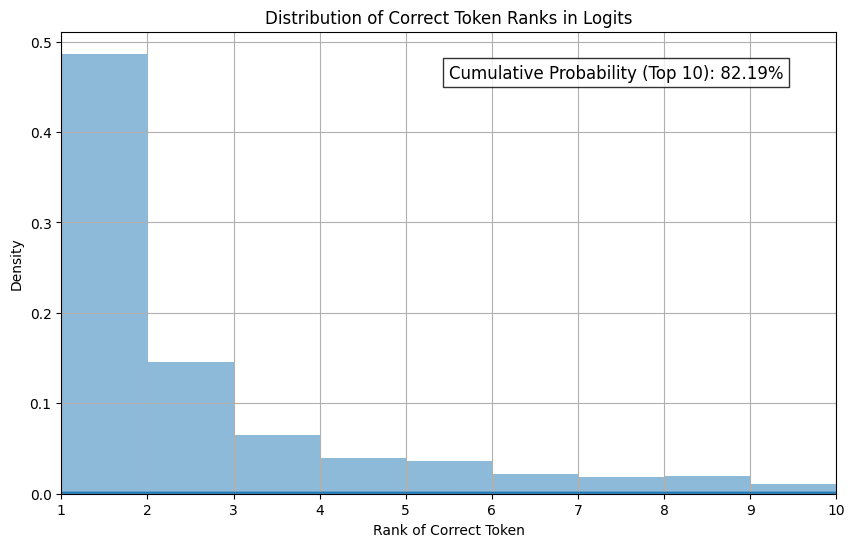

In [23]:
# 1B Model
# Batch size 2 for test, and new batch 
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

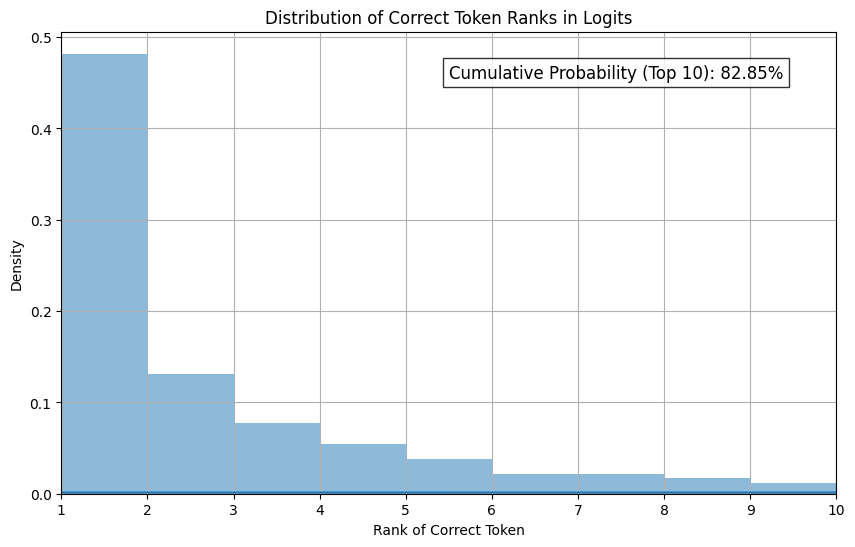

In [22]:
# Batch size 2 for test, and new batch 
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

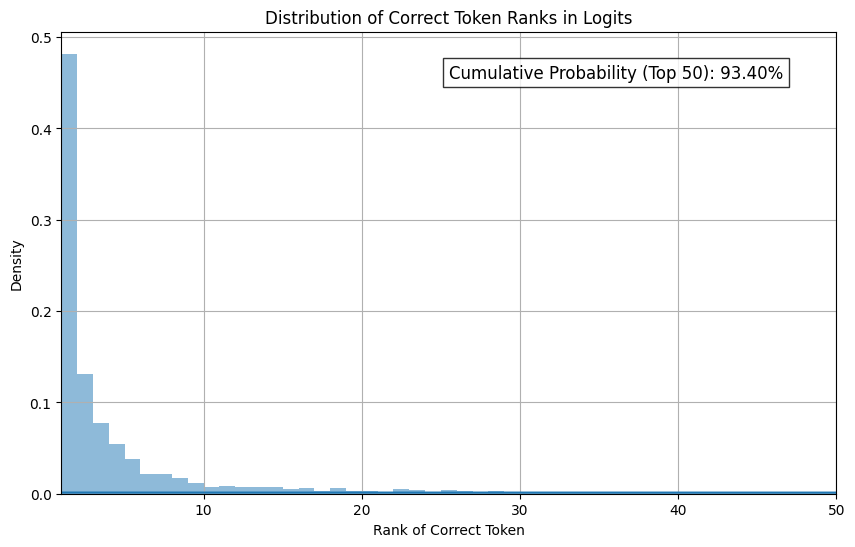

In [22]:
# Batch size 2 for test, and new batch 
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

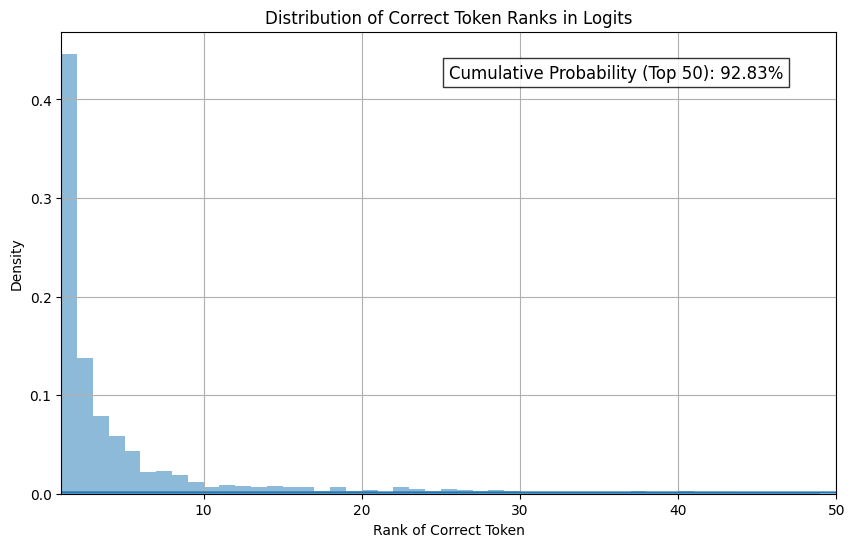

In [19]:
# Batch size original
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Un-initialized Projector

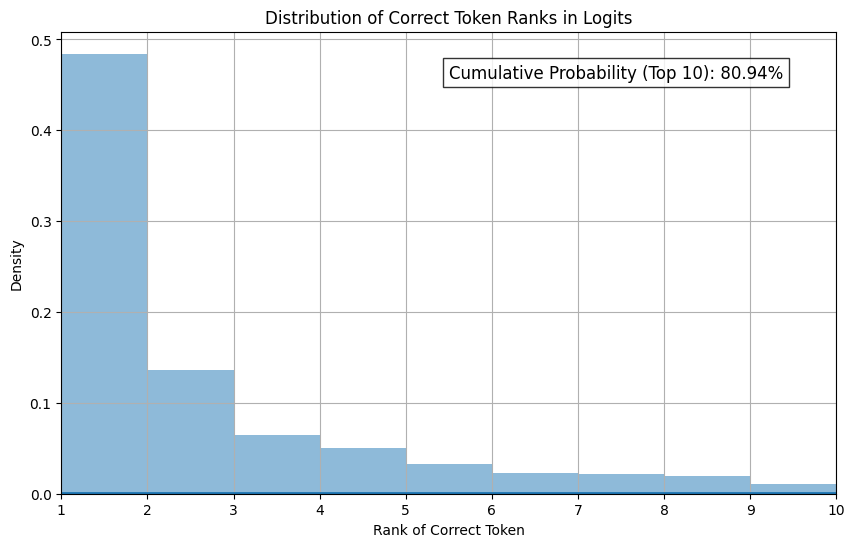

In [21]:
# 1B Model
# Batch size 2 for test, and new batch 
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

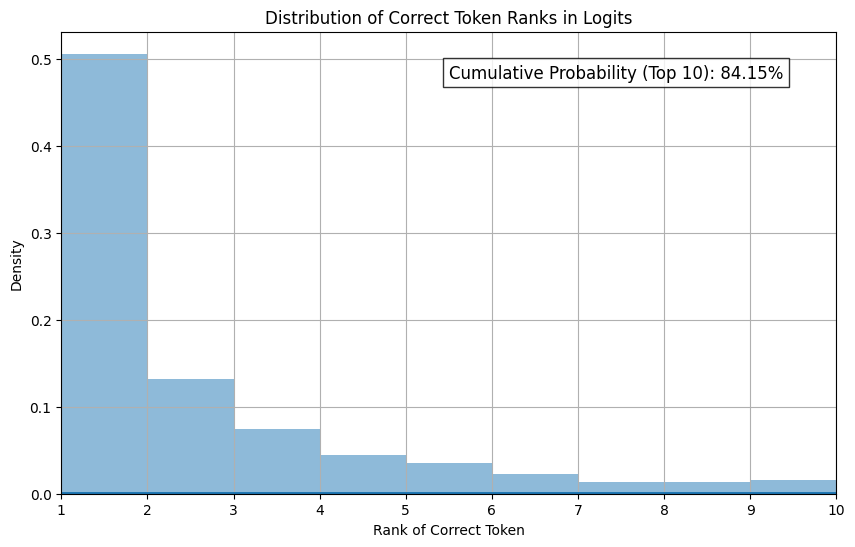

In [24]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

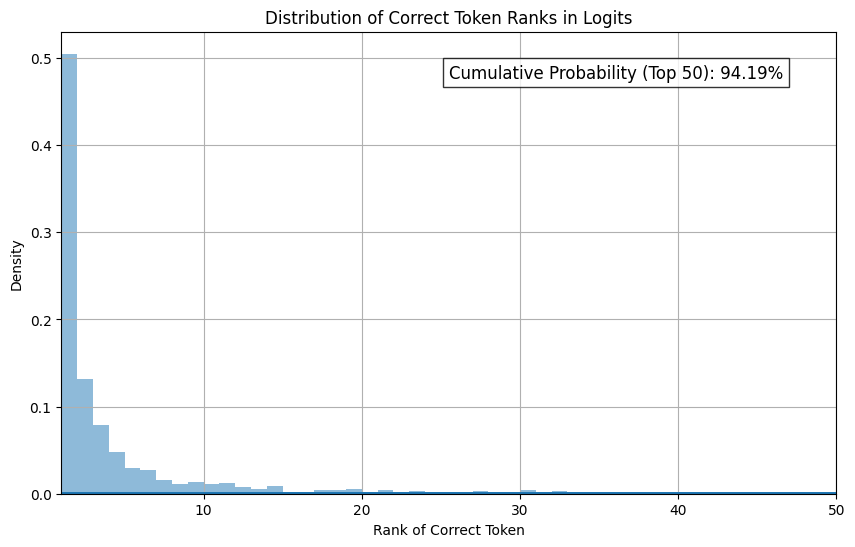

In [17]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# With Normalization using Covariance Matching (No regularization)

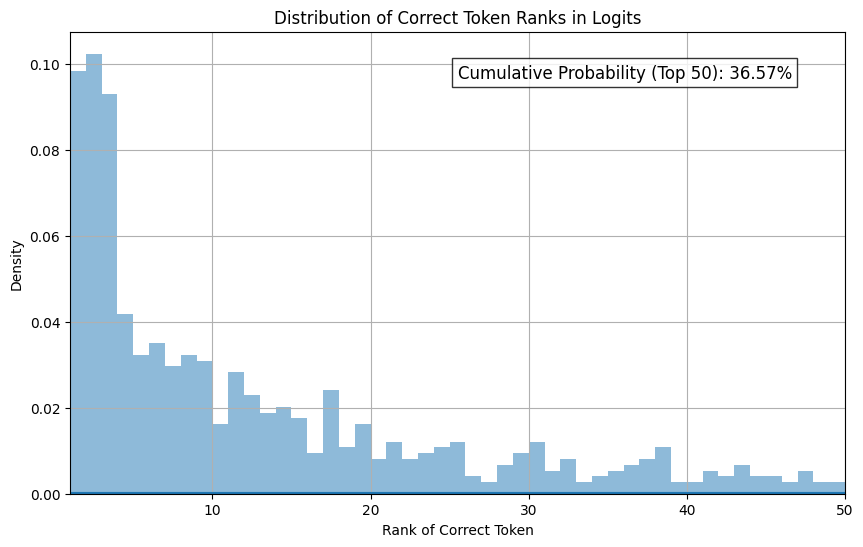

In [23]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# With Normalization + Regularization (FP64 precision)
## Lambda = 1e-1

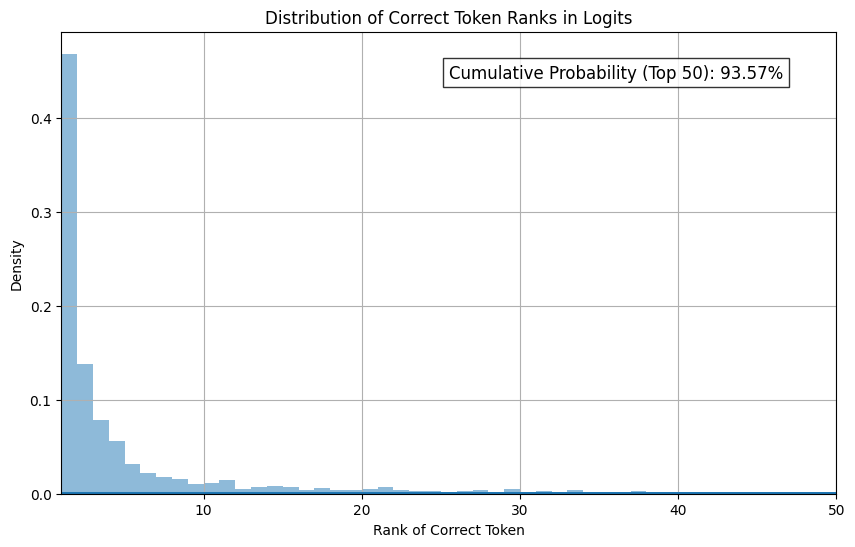

In [31]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# With Normalization + Regularization (FP64 precision, Batch = 100)
## Lambda = 1e-1

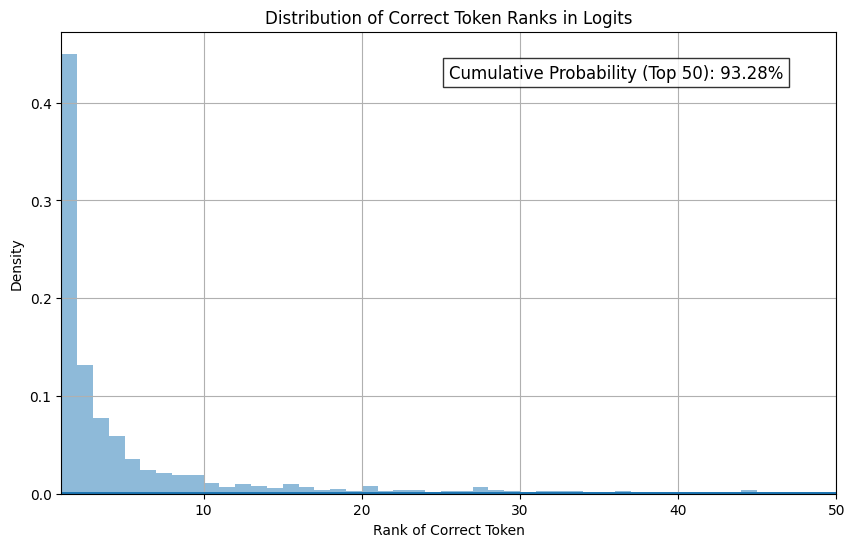

In [16]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# With Normalization + Regularization (FP64 precision, LedoitWolf Covariance Estimation)

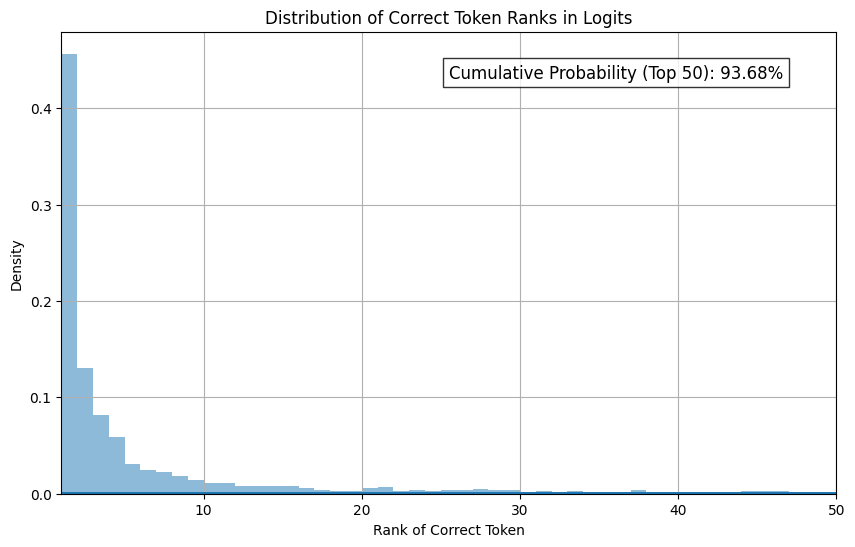

In [22]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Norm. + Reg. (FP64 precision, LedoitWolf + Bias, Batch = 1000)

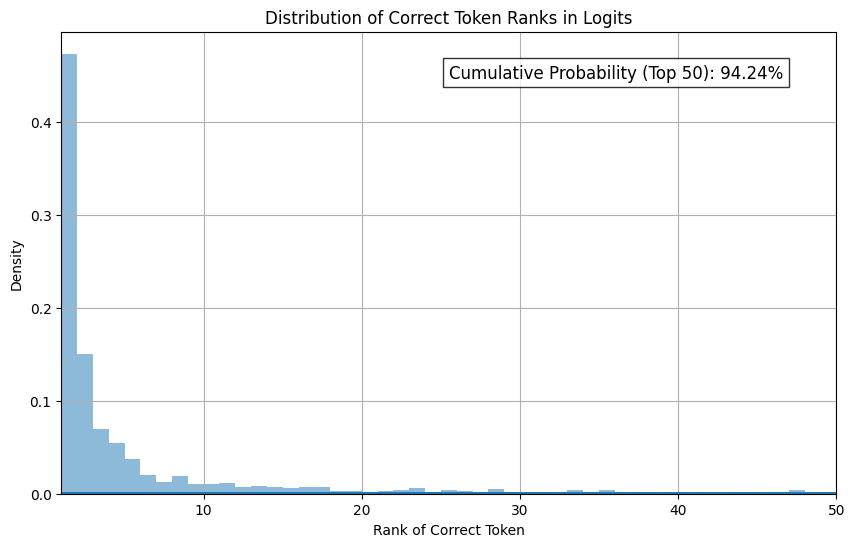

In [17]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Norm. + Reg. (LedoitWolf + Bias, Batch = 2*800, FP64)
Evaluated on test batch of 2

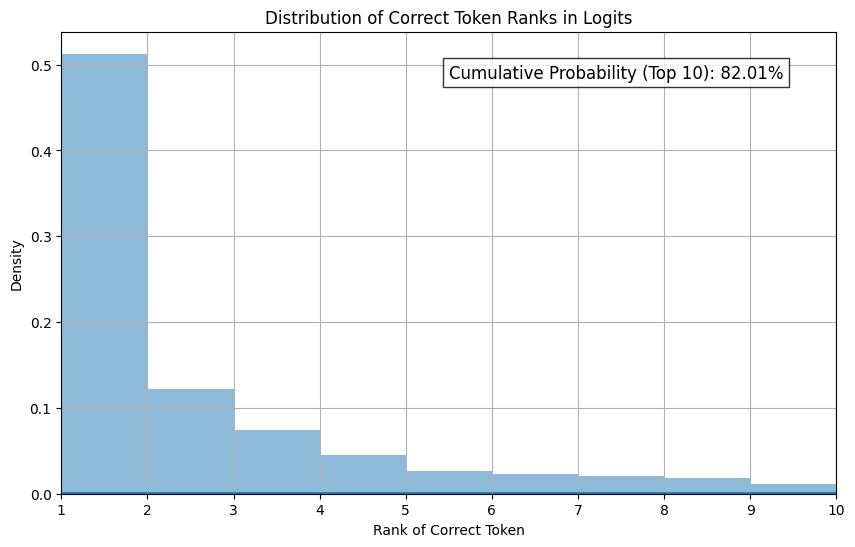

In [30]:
#1B Model
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

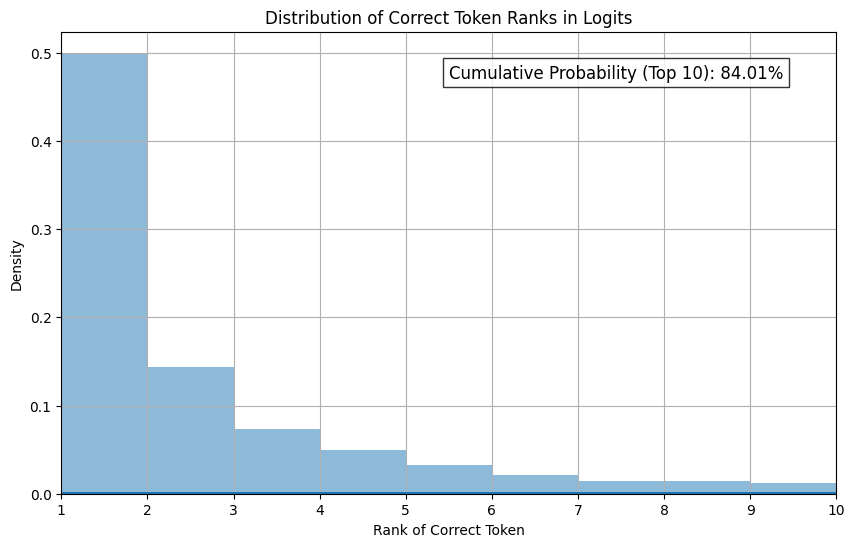

In [20]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

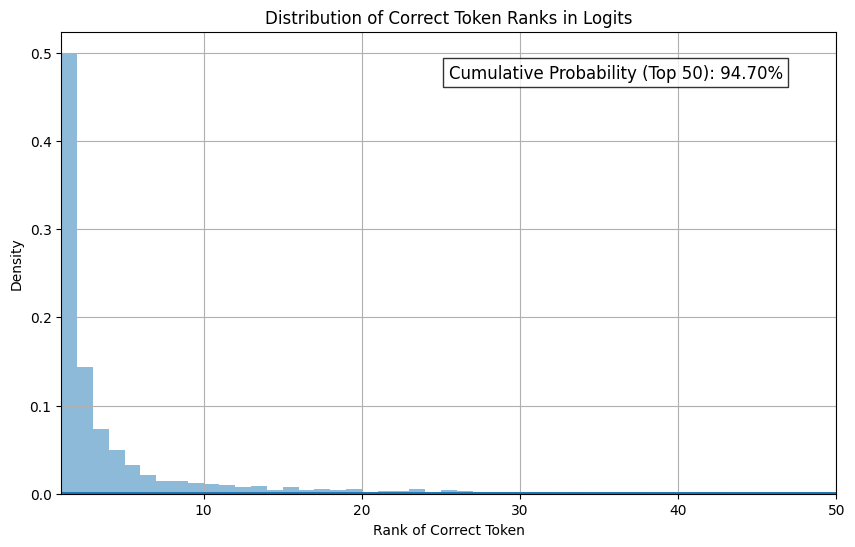

In [16]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Norm. + Reg. (FP64 precision, LedoitWolf + Bias, Batch = 1000, Radial Correction)

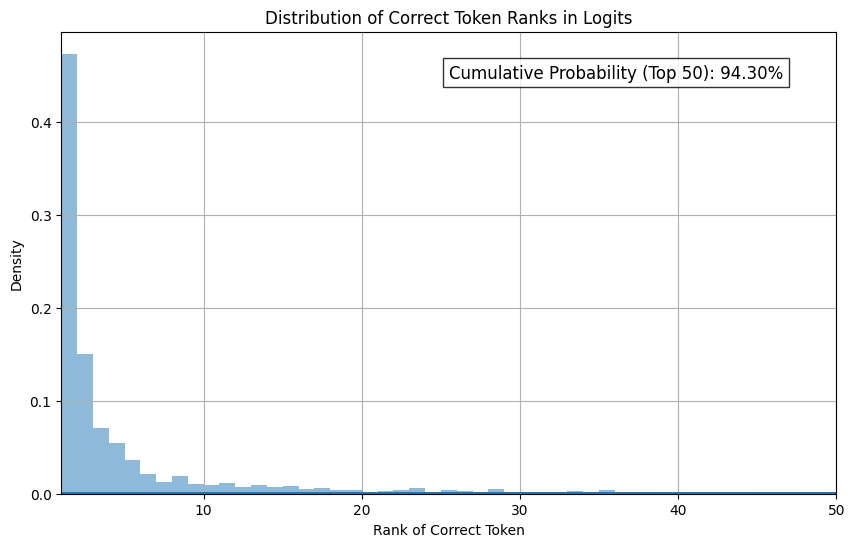

In [23]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# With Normalization + Regularization (FP64 precision, LedoitWolf + Bias correction)

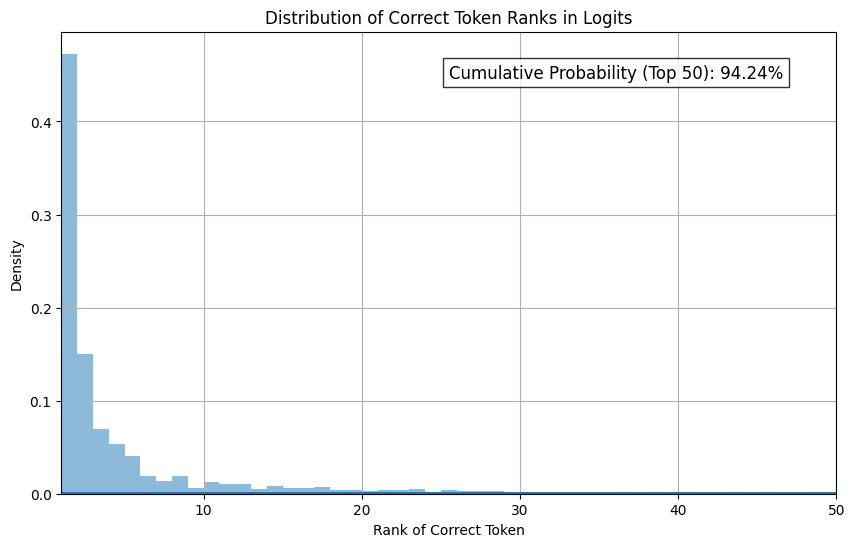

In [20]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# With Normalization using Covariance Matching (with regularization)

### Lambda = 1e-3

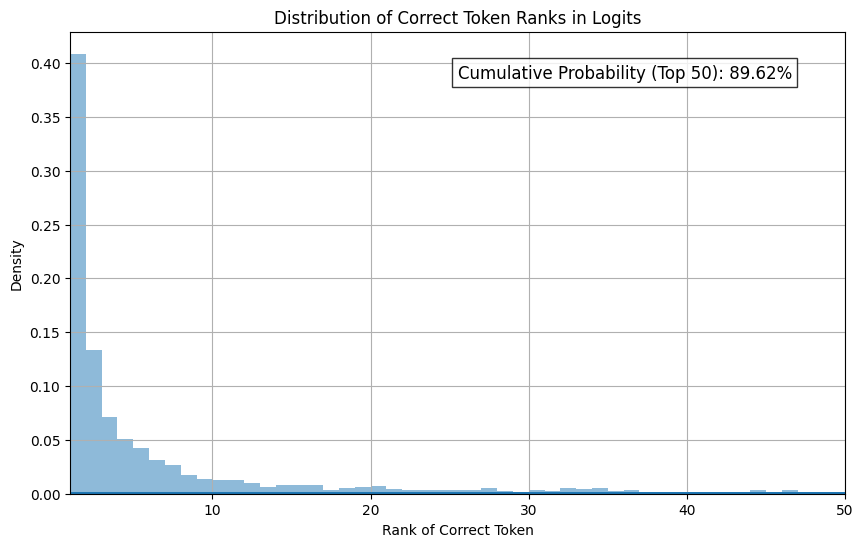

In [17]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

## Lambda = 1e-2

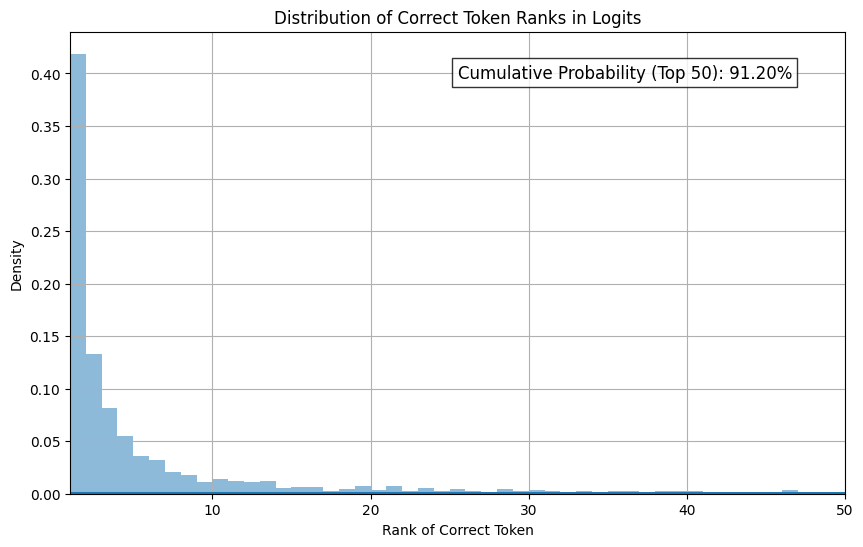

In [24]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Lambda 1e-1

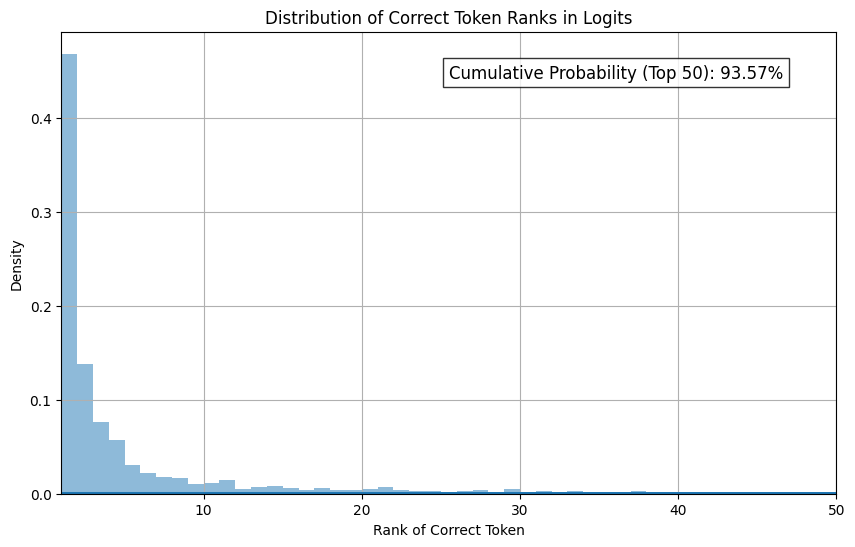

In [37]:

plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Lambda 0.5

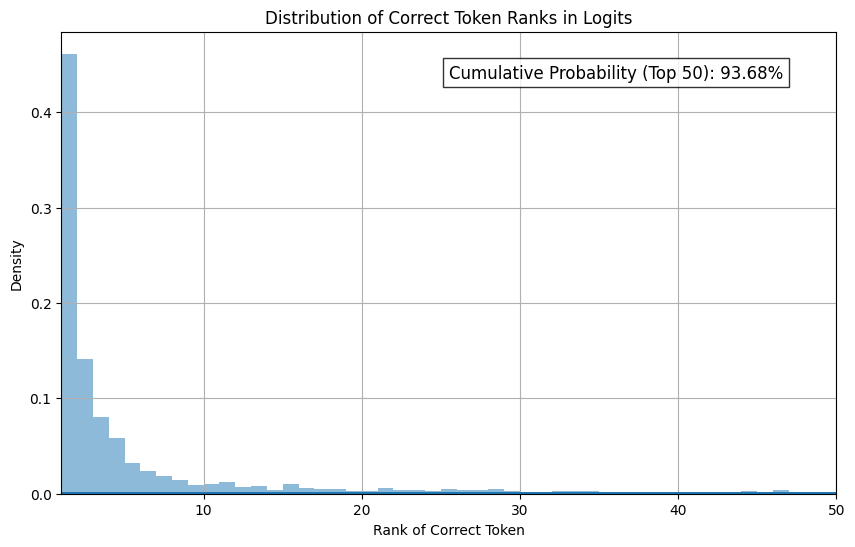

In [47]:

plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

# Text Only, No Multimodal Injection

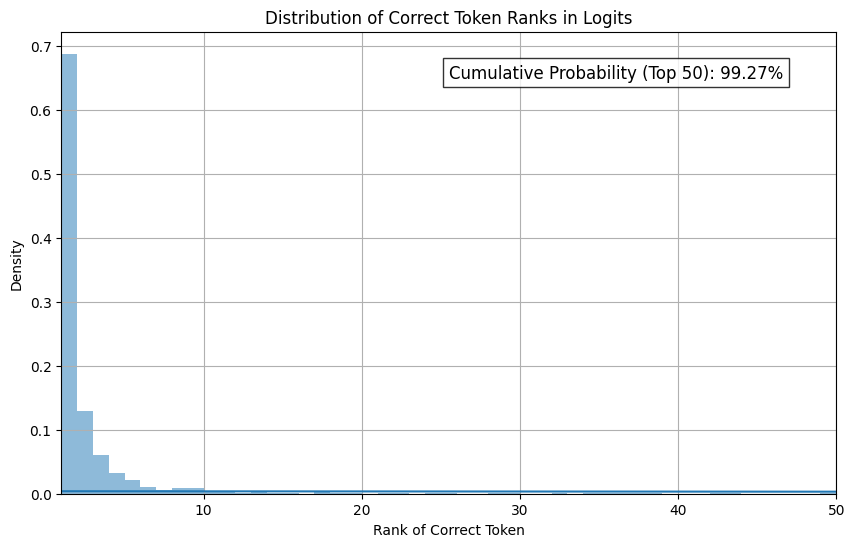

In [19]:
plot_correct_token_rank_distribution(output, fused_labels if multimodal_inject is not None else labels)

In [32]:
import torch
import matplotlib.pyplot as plt

def analyze_embedding_stats(embeddings: torch.Tensor, name: str):
    """
    Analyzes and prints statistical properties of a given embedding tensor.
    Also plots histograms to visualize distributions.
    
    Args:
        embeddings (torch.Tensor): e.g. shape (batch_size, num_items, embed_dim)
        name (str): A label for these embeddings, e.g. "Projected Patch" or "Input"
    """
    # Move embeddings to CPU and float32 for stable analysis if needed
    emb = embeddings.to(torch.float32).cpu()
    
    # Flatten to a large 1D array for global stats
    flat = emb.view(-1)
    
    # Basic stats
    mean_val = flat.mean().item()
    std_val = flat.std().item()
    min_val = flat.min().item()
    max_val = flat.max().item()
    
    # Norms: L2 norm per embedding vector
    # If your embedding shape is (B, N, D), compute norm per vector in dimension -1
    # Then average over them for a global view
    norms = emb.norm(p=2, dim=-1)  # shape: (B, N)
    mean_norm = norms.mean().item()
    std_norm = norms.std().item()
    min_norm = norms.min().item()
    max_norm = norms.max().item()
    
    # Sign properties: fraction of positive/negative values
    num_positive = (flat > 0).sum().item()
    num_negative = (flat < 0).sum().item()
    total_vals = flat.numel()
    fraction_positive = num_positive / total_vals
    fraction_negative = num_negative / total_vals
    
    # Print statistics
    print(f"\n{name} Embeddings Stats:")
    print(f"  Value Distribution:")
    print(f"    Mean: {mean_val:.6f}, Std: {std_val:.6f}")
    print(f"    Min: {min_val:.6f}, Max: {max_val:.6f}")
    print(f"  Norm (L2) per embedding vector:")
    print(f"    Mean Norm: {mean_norm:.6f}, Std Norm: {std_norm:.6f}")
    print(f"    Min Norm: {min_norm:.6f}, Max Norm: {max_norm:.6f}")
    print(f"  Sign Distribution:")
    print(f"    Fraction Positive: {fraction_positive:.4f}")
    print(f"    Fraction Negative: {fraction_negative:.4f}")
    print(f"    Fraction Zero: {1 - fraction_positive - fraction_negative:.4f}\n")
    
    # Plot histograms of values and norms for a visual perspective
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(flat.numpy(), bins=100, color='skyblue', edgecolor='black')
    plt.title(f"{name} Values Distribution")
    plt.xlabel("Value")
    plt.ylabel("Count")
    
    plt.subplot(1,2,2)
    plt.hist(norms.view(-1).numpy(), bins=50, color='lightgreen', edgecolor='black')
    plt.title(f"{name} Norms Distribution")
    plt.xlabel("L2 Norm")
    plt.ylabel("Count")
    
    plt.tight_layout()
    plt.show()

# Default Pre-trained Projector


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.003333, Std: 3.057002
    Min: -108.041656, Max: 107.681885
  Norm (L2) per embedding vector:
    Mean Norm: 89.921539, Std Norm: 105.225662
    Min Norm: 24.900702, Max Norm: 1433.887695
  Sign Distribution:
    Fraction Positive: 0.5010
    Fraction Negative: 0.4990
    Fraction Zero: -0.0000



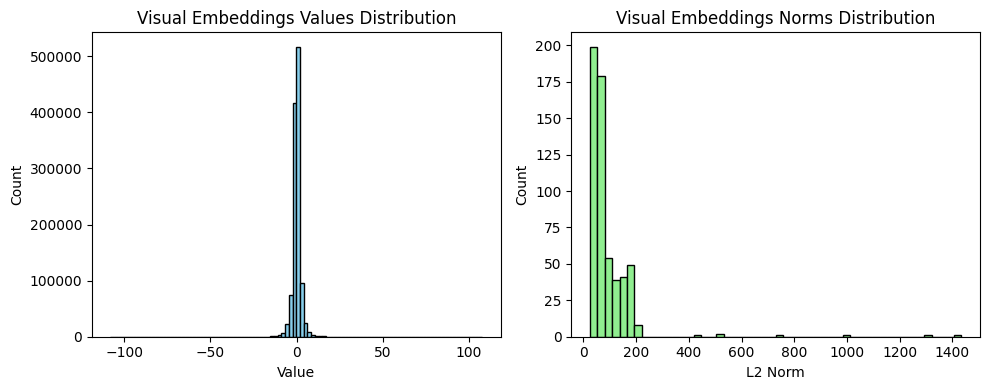


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.000031, Std: 0.016883
    Min: -0.376953, Max: 0.351562
  Norm (L2) per embedding vector:
    Mean Norm: 0.628824, Std Norm: 0.434033
    Min Norm: 0.098608, Max Norm: 1.083495
  Sign Distribution:
    Fraction Positive: 0.5019
    Fraction Negative: 0.4981
    Fraction Zero: 0.0000



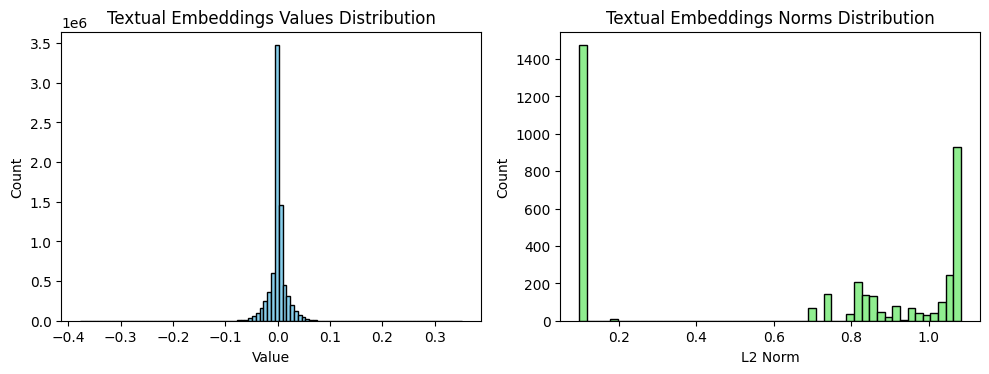

In [21]:
# 1B Model
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.006121, Std: 4.301576
    Min: -176.026337, Max: 182.124084
  Norm (L2) per embedding vector:
    Mean Norm: 61.300400, Std Norm: 123.354462
    Min Norm: 21.643597, Max Norm: 1740.917847
  Sign Distribution:
    Fraction Positive: 0.5026
    Fraction Negative: 0.4974
    Fraction Zero: -0.0000



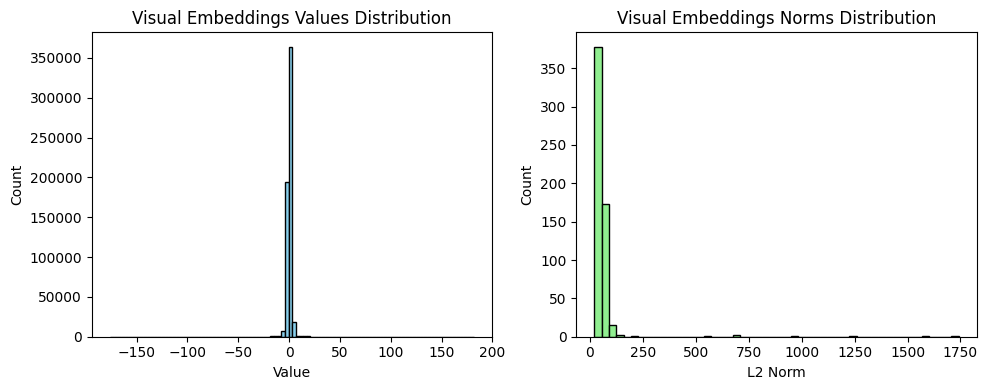


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000010, Std: 0.017770
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.465880, Std Norm: 0.326080
    Min Norm: 0.069976, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4974
    Fraction Negative: 0.5026
    Fraction Zero: 0.0000



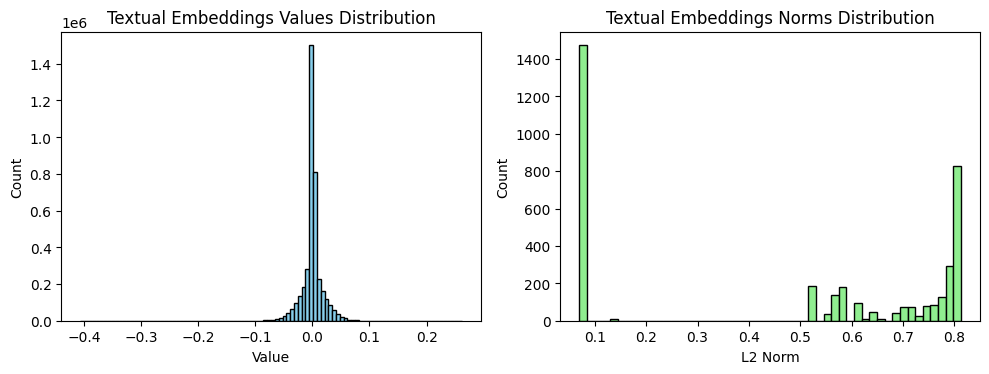

In [21]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# Unitiailized Projector


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.017584, Std: 0.598882
    Min: -8.539736, Max: 8.652713
  Norm (L2) per embedding vector:
    Mean Norm: 16.720757, Std Norm: 9.388999
    Min Norm: 10.344311, Max Norm: 120.666283
  Sign Distribution:
    Fraction Positive: 0.4855
    Fraction Negative: 0.5145
    Fraction Zero: 0.0000



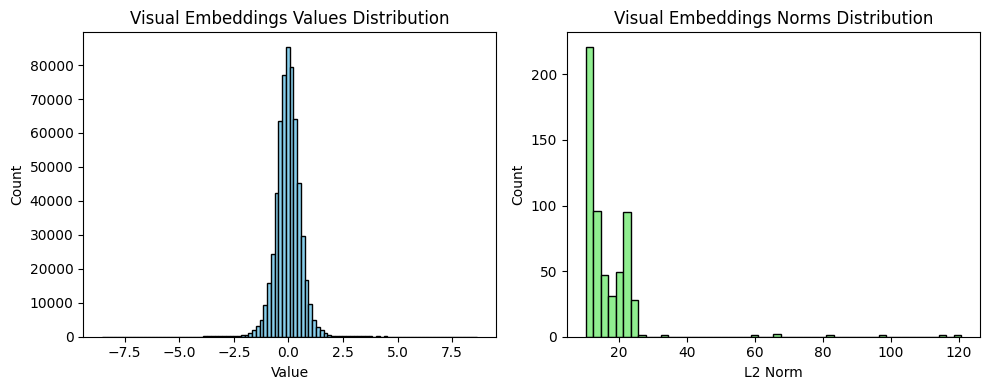


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000010, Std: 0.017770
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.465880, Std Norm: 0.326080
    Min Norm: 0.069976, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4974
    Fraction Negative: 0.5026
    Fraction Zero: 0.0000



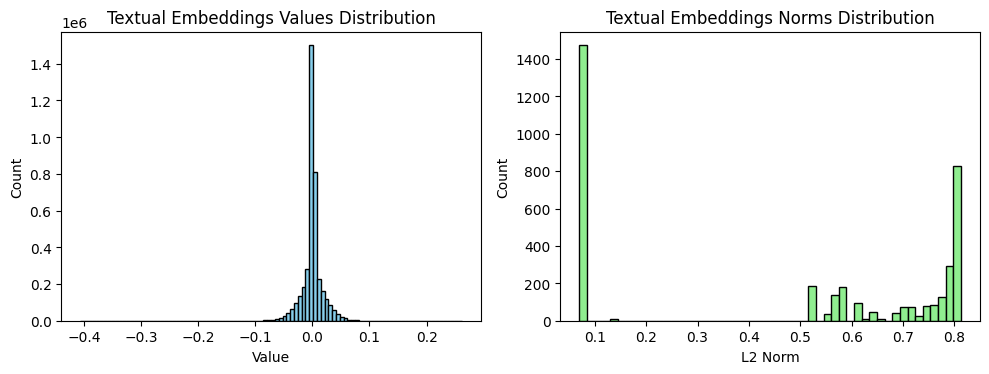

In [19]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# Normalization with Covariance (no regularization)


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -2.524041, Std: 1416.110352
    Min: -5950.320312, Max: 7982.254395
  Norm (L2) per embedding vector:
    Mean Norm: 45315.562500, Std Norm: 15.871540
    Min Norm: 45248.855469, Max Norm: 45375.476562
  Sign Distribution:
    Fraction Positive: 0.4860
    Fraction Negative: 0.5140
    Fraction Zero: 0.0000



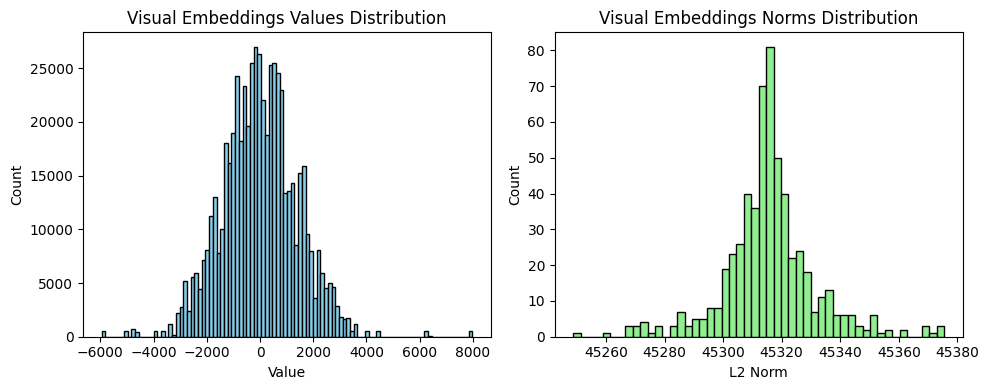


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



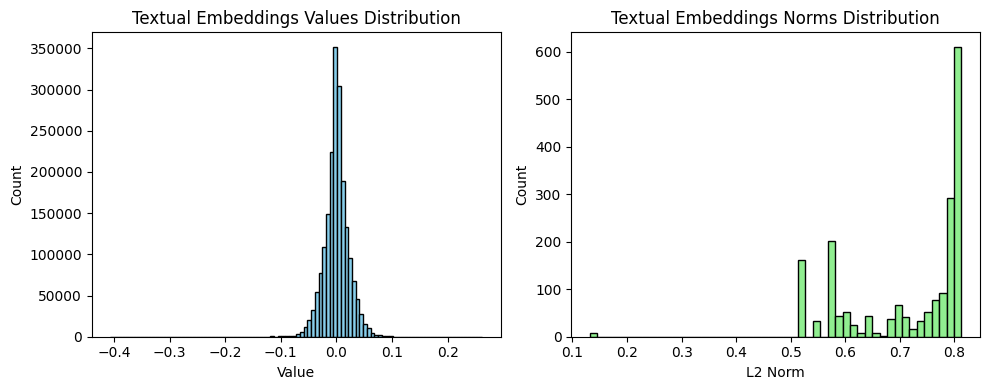

In [28]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# Norm. + Reg. (FP64 precision, LedoitWolf + Bias, Batch = 800 * 2)
Tested on eval batch of 2


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.000037, Std: 0.010103
    Min: -0.183019, Max: 0.186306
  Norm (L2) per embedding vector:
    Mean Norm: 0.454798, Std Norm: 0.046896
    Min Norm: 0.347769, Max Norm: 0.684839
  Sign Distribution:
    Fraction Positive: 0.5023
    Fraction Negative: 0.4977
    Fraction Zero: 0.0000



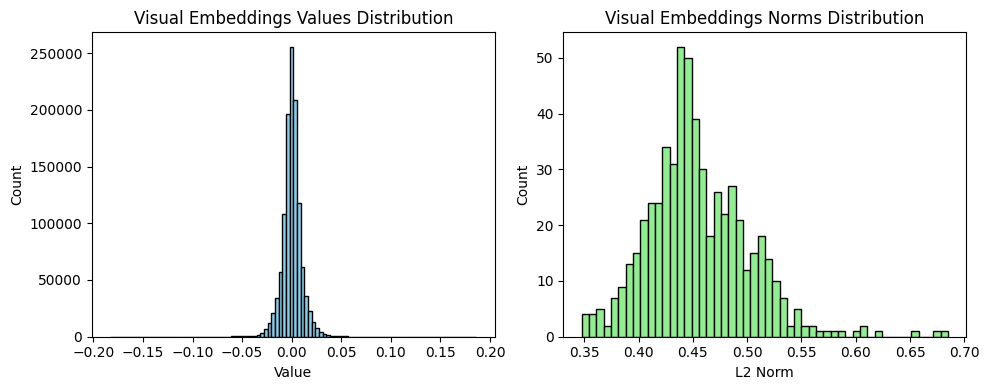


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.000031, Std: 0.016883
    Min: -0.376953, Max: 0.351562
  Norm (L2) per embedding vector:
    Mean Norm: 0.628824, Std Norm: 0.434033
    Min Norm: 0.098608, Max Norm: 1.083495
  Sign Distribution:
    Fraction Positive: 0.5019
    Fraction Negative: 0.4981
    Fraction Zero: 0.0000



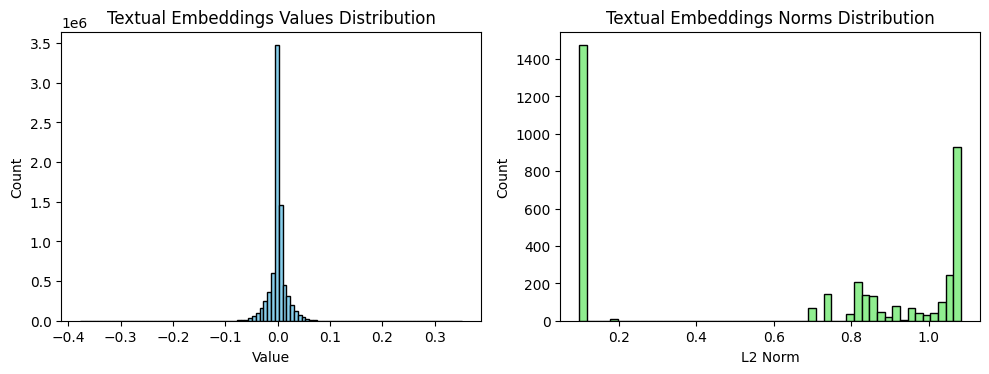

In [34]:
# 1B Model
#1B Model
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000012, Std: 0.014552
    Min: -0.318187, Max: 0.203030
  Norm (L2) per embedding vector:
    Mean Norm: 0.463932, Std Norm: 0.040071
    Min Norm: 0.351276, Max Norm: 0.615194
  Sign Distribution:
    Fraction Positive: 0.5000
    Fraction Negative: 0.5000
    Fraction Zero: 0.0000



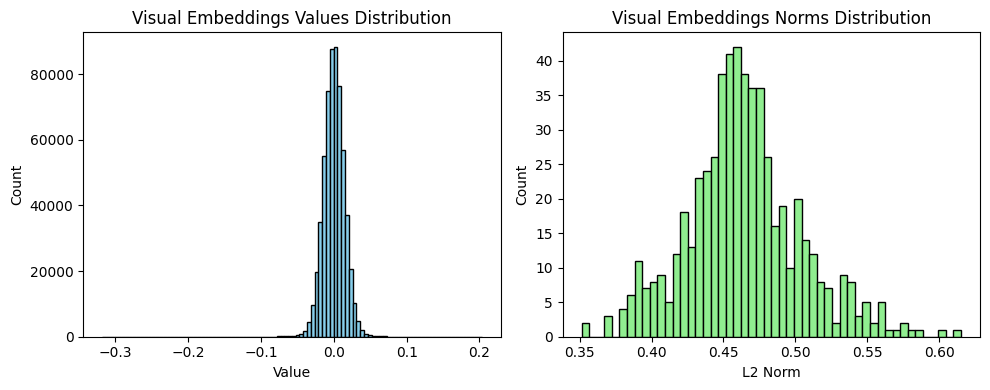


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000010, Std: 0.017770
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.465880, Std Norm: 0.326080
    Min Norm: 0.069976, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4974
    Fraction Negative: 0.5026
    Fraction Zero: 0.0000



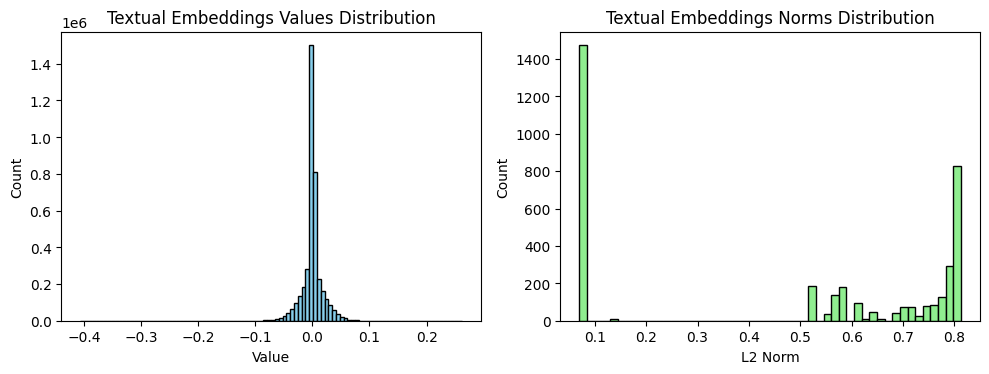

In [18]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# Norm. + Reg. (FP64 precision, LedoitWolf + Bias, Batch = 1000, Radial Correction)


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000028, Std: 0.022599
    Min: -0.589463, Max: 0.366477
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.416719, Max Norm: 1.141324
  Sign Distribution:
    Fraction Positive: 0.5002
    Fraction Negative: 0.4998
    Fraction Zero: 0.0000



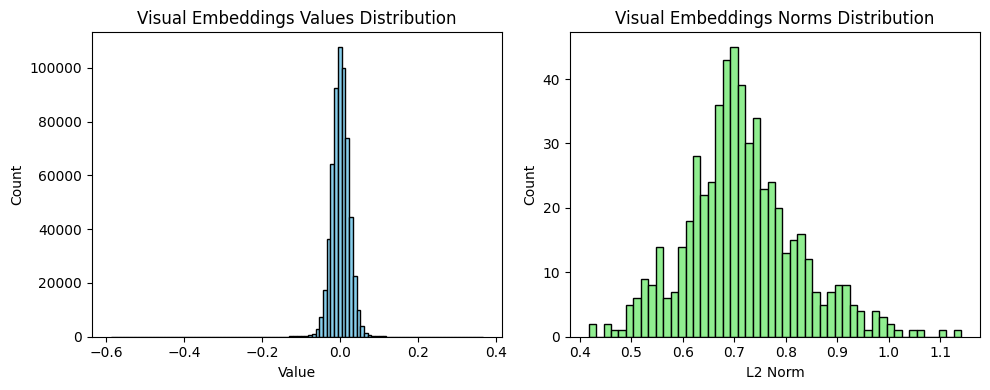


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



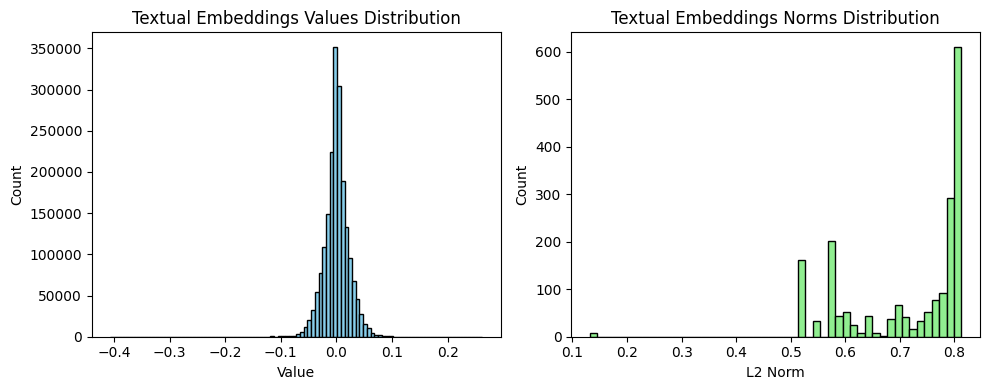

In [25]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# With Normalization + Regularization (FP64 precision, LedoitWolf + Bias correction)


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000021, Std: 0.015509
    Min: -0.377609, Max: 0.222080
  Norm (L2) per embedding vector:
    Mean Norm: 0.491350, Std Norm: 0.069826
    Min Norm: 0.317587, Max Norm: 0.712858
  Sign Distribution:
    Fraction Positive: 0.5009
    Fraction Negative: 0.4991
    Fraction Zero: 0.0000



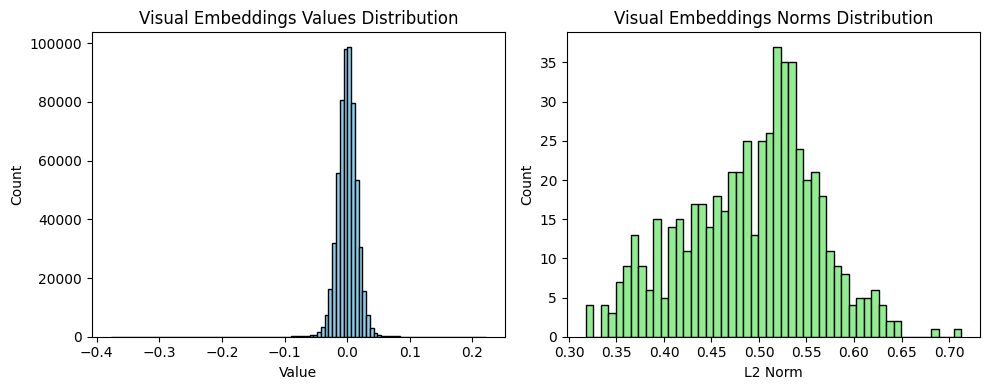


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



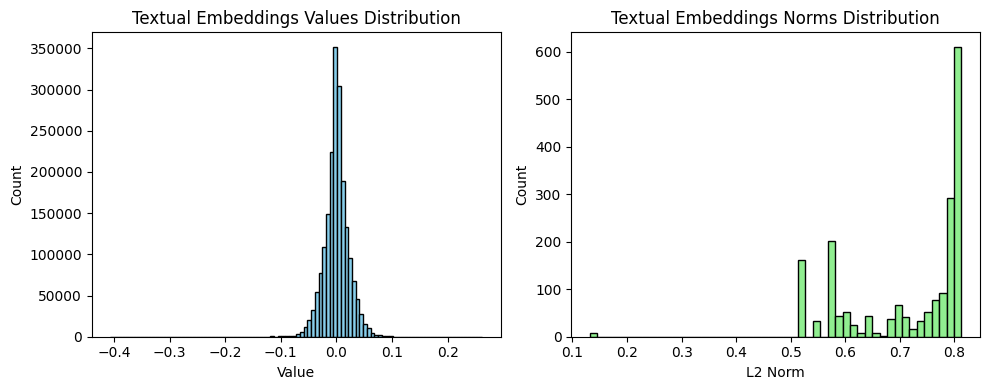

In [23]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")
# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# With Normalization + Regularization (FP64 precision, LedoitWolf Covariance Estimation)


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.004602, Std: 0.131650
    Min: -0.987442, Max: 1.030678
  Norm (L2) per embedding vector:
    Mean Norm: 4.215096, Std Norm: 0.047906
    Min Norm: 4.066455, Max Norm: 4.358922
  Sign Distribution:
    Fraction Positive: 0.5205
    Fraction Negative: 0.4795
    Fraction Zero: 0.0000



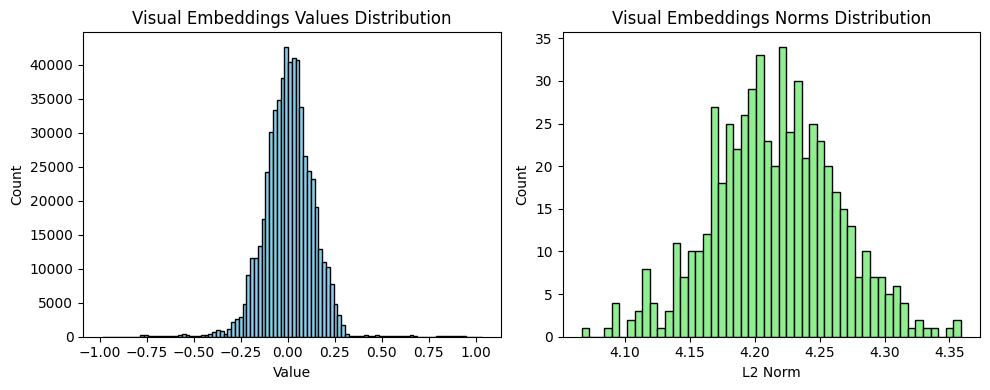


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



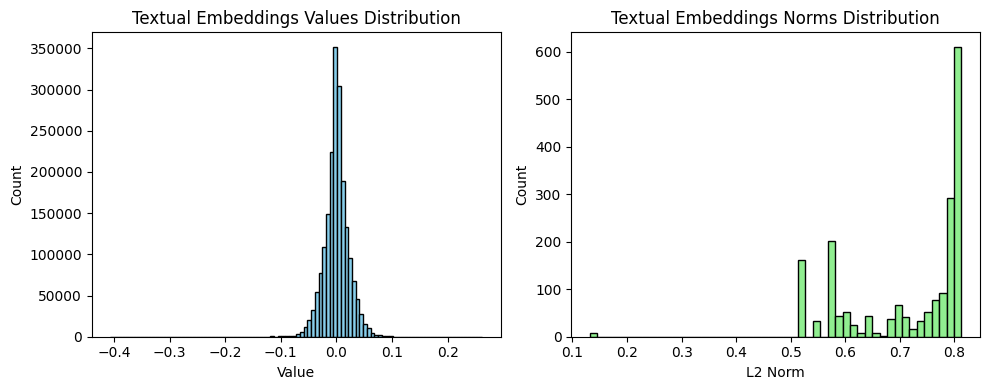

In [24]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")
# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# Normalization with Covariance (w. regularization, Batch = 100, λ = 1e-1)


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.004247, Std: 0.109268
    Min: -0.897194, Max: 0.910681
  Norm (L2) per embedding vector:
    Mean Norm: 3.498906, Std Norm: 0.047122
    Min Norm: 3.352372, Max Norm: 3.648081
  Sign Distribution:
    Fraction Positive: 0.5240
    Fraction Negative: 0.4760
    Fraction Zero: 0.0000



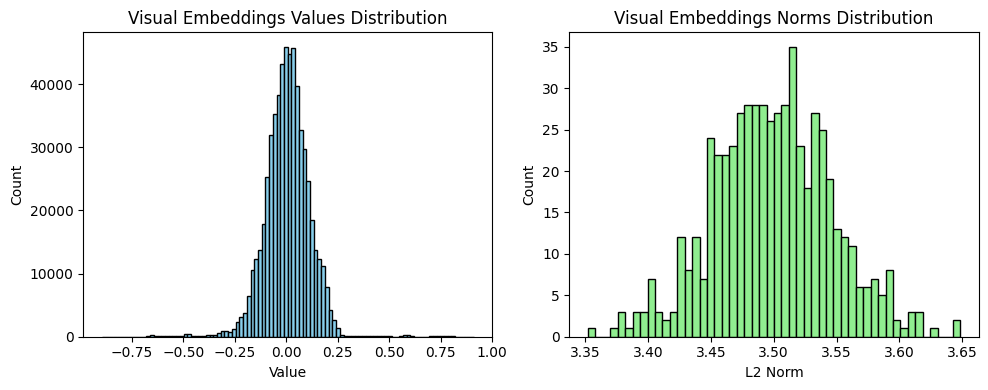


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



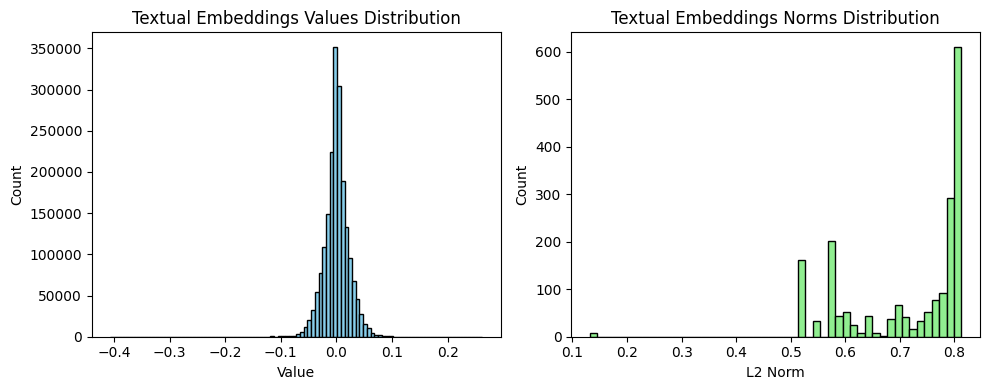

In [20]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

# Normalization with Covariance (w. regularization)

## Lambda = 1e-3


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.001200, Std: 0.104321
    Min: -0.875678, Max: 1.015691
  Norm (L2) per embedding vector:
    Mean Norm: 3.337876, Std Norm: 0.064304
    Min Norm: 3.140583, Max Norm: 3.577172
  Sign Distribution:
    Fraction Positive: 0.5077
    Fraction Negative: 0.4923
    Fraction Zero: 0.0000



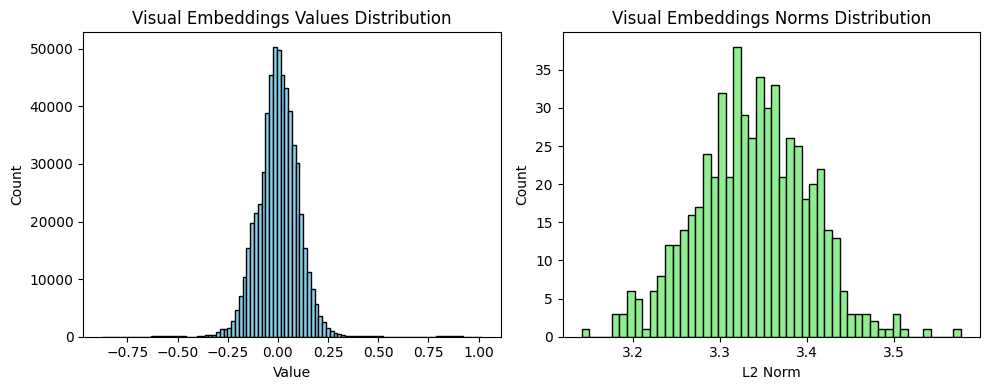


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



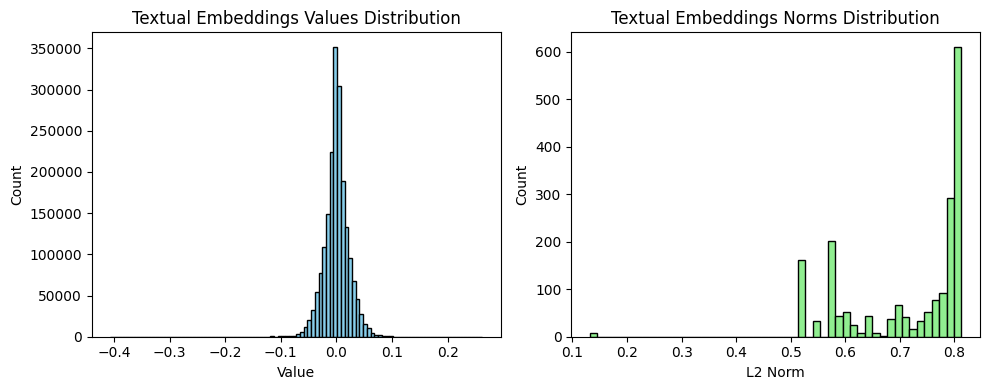

In [19]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

### lambda = 1e-2


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.000739, Std: 0.044935
    Min: -0.524171, Max: 0.508676
  Norm (L2) per embedding vector:
    Mean Norm: 1.436995, Std Norm: 0.056931
    Min Norm: 1.304034, Max Norm: 1.696798
  Sign Distribution:
    Fraction Positive: 0.5113
    Fraction Negative: 0.4887
    Fraction Zero: 0.0000



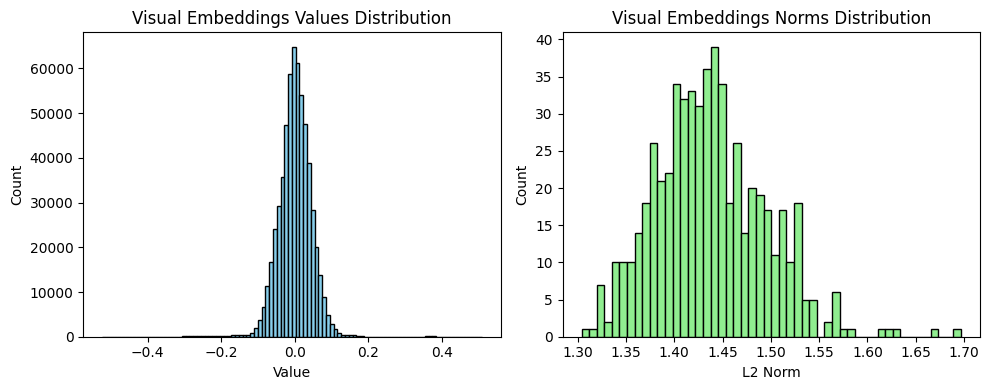


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



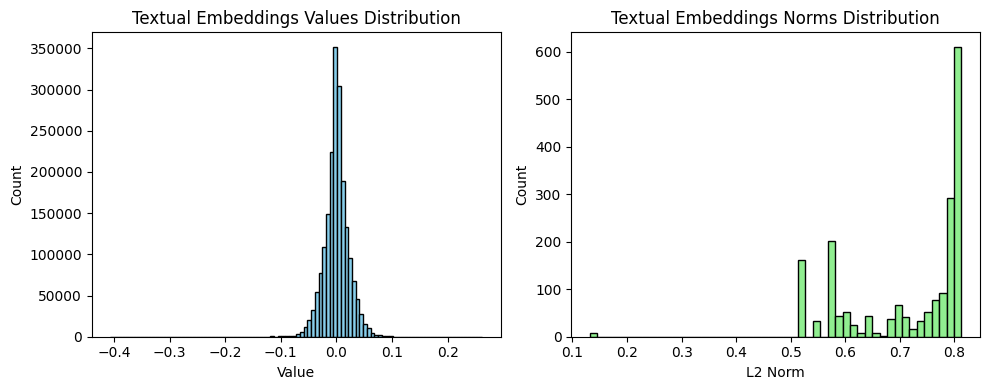

In [25]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

### lambda = 1e-1


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.000377, Std: 0.018447
    Min: -0.233613, Max: 0.224504
  Norm (L2) per embedding vector:
    Mean Norm: 0.588832, Std Norm: 0.043309
    Min Norm: 0.496970, Max Norm: 0.791074
  Sign Distribution:
    Fraction Positive: 0.5191
    Fraction Negative: 0.4809
    Fraction Zero: -0.0000



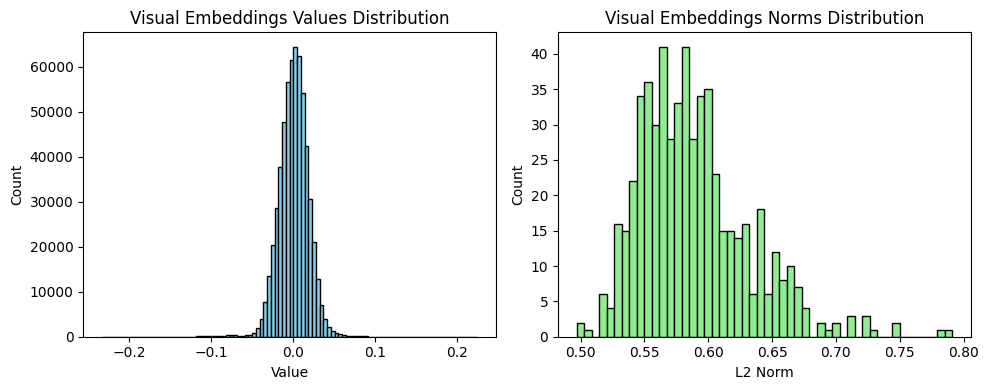


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



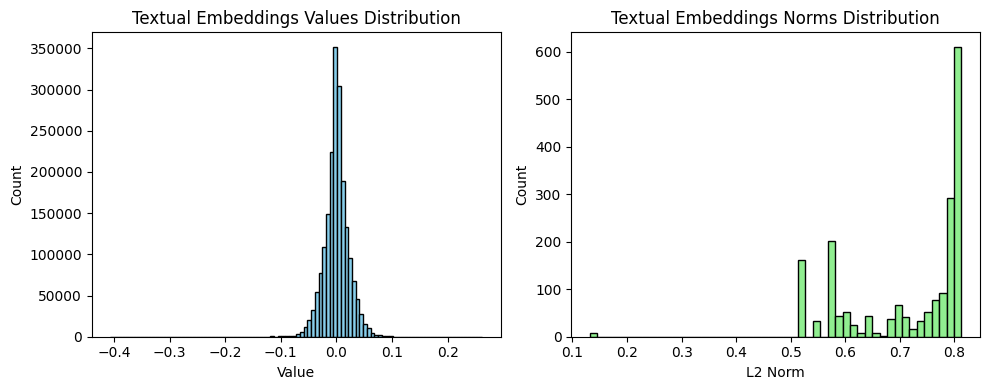

In [39]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

## lambda 0.5


Visual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: 0.000203, Std: 0.009734
    Min: -0.115618, Max: 0.123204
  Norm (L2) per embedding vector:
    Mean Norm: 0.309898, Std Norm: 0.032079
    Min Norm: 0.247056, Max Norm: 0.442920
  Sign Distribution:
    Fraction Positive: 0.5199
    Fraction Negative: 0.4801
    Fraction Zero: 0.0000



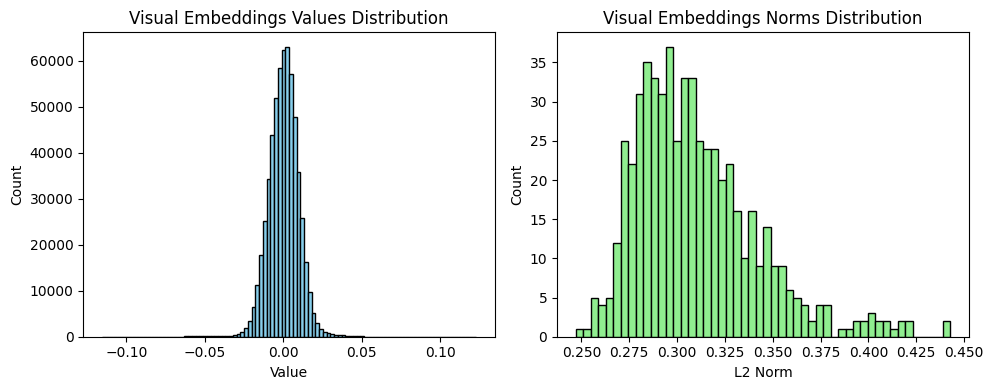


Textual Embeddings Embeddings Stats:
  Value Distribution:
    Mean: -0.000023, Std: 0.022600
    Min: -0.406250, Max: 0.261719
  Norm (L2) per embedding vector:
    Mean Norm: 0.714908, Std Norm: 0.109186
    Min Norm: 0.131908, Max Norm: 0.812785
  Sign Distribution:
    Fraction Positive: 0.4973
    Fraction Negative: 0.5027
    Fraction Zero: 0.0000



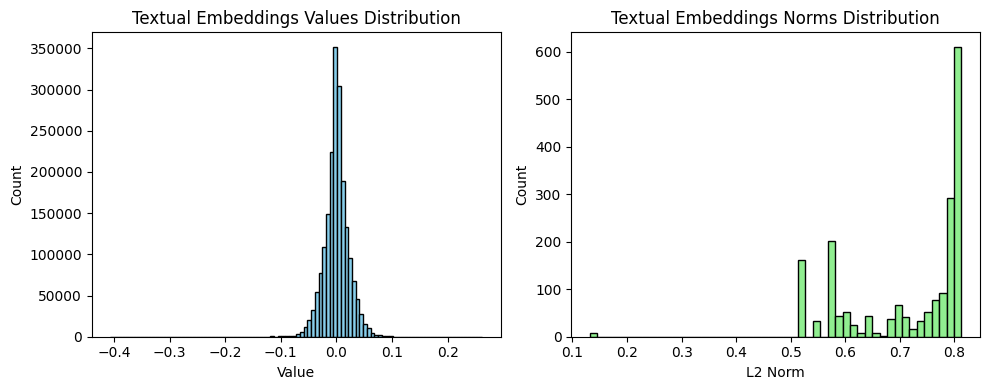

In [50]:
projected_patch_embeddings_copy = projected_patch_embeddings.detach().clone()
input_embeddings_copy = input_embeddings.detach().clone()
# Analyze projected patch embeddings
analyze_embedding_stats(projected_patch_embeddings_copy, "Visual Embeddings")

# Analyze input embeddings
analyze_embedding_stats(input_embeddings_copy, "Textual Embeddings")

import torch
vlm.model.train()
with torch.autocast("cuda", dtype=torch.bfloat16):
    batch = {k: v.to("cuda") if isinstance(v, torch.Tensor) else v for k, v in batch.items()}
    input_ids, attention_mask, pixel_values, labels, multimodal_indices = batch["input_ids"], batch["attention_mask"], batch["pixel_values"], batch["labels"], batch["multimodal_indices"]
    
    output, fused_labels = vlm.model(
                                input_ids=batch["input_ids"],
                                attention_mask=batch["attention_mask"],
                                pixel_values=batch["pixel_values"],
                                labels=batch["labels"],
                                multimodal_indices=batch["multimodal_indices"],
                                return_labels=True,
                            )
    